# Хакатон Skillfactory x Teplitsa Lab

#### Работа команды №13

**Состав команды:**

- Расим Хисамов (капитан)
- Анастасия Дыкленко
- Дарья Левчук
- Татьяна Казакевич
- Алексей Невельский

# Задача 2. Анализ бухгалтерской отчетности НКО

Из Росстата получены данные бухгалтерской отчетности всех действующих на май 2022 года фондов в России:

- Благотворительные фонды (ОКОПФ 070401)
- Общественные фонды (ОКОПФ 070403)
- Экологические фонды (ОКОПФ 070404)

Данные представлены за 2017-2021 годы. Считаем, что если в данных нет сведений по отчетности за какой-то год, это означает, что организация не предоставила отчетность за этот год. 

Общие задачи:

- Очистить и описать данные
- Для тех организаций, которые подали отчетность, узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников
- Определить факторы, влияющие на закредитованность, финансовое благополучие организации
- Любые дополнительные выводы и проверки

# Формализованные задачи

После ознакомления с исходными данными, нашей командой были сформулированы следующие гипотезы, позволяющие оценить финансовое и материальное благополучие НКО.

**Гипотеза 1**

*Определить, может ли опыт ликвидируемых и реорганизуемых НКО стать предостережением для всей отрасли.*

**Гипотеза 2**

*Определить факторы, влияющие на закредитованность НКО.*

**Гипотеза 3**

*Определить устойчивость финансового положения НКО через соотношение дебиторской и кредиторской задолженности.*

**Гипотеза 4**

*Выявить и исследовать наличие зависимости финансирования НКО и их финансового потенциала от организационно-правовой формы.*

**Гипотеза 5**

*Определить, есть ли зависимость  между среднесписочной численностью работников НКО и основными финансовыми показателями (денежные средства и их эквиваленты, капитал и резервы, всего поступивших средств).*

**Гипотеза 6**

*Оценить, как связно материальное благополучие НКО и среднесписочная численность работников.*

**Гипотеза 7**

*Оценить степень закредитованности НКО в разрезе организационно-правовых форм.*

**Гипотеза 8**

*Оценить зависимость объема заемных средств благотворительных фондов от их возраста (периода деятельности) в Москве и регионах.*

**Гипотеза 9**

*Определить, как менялось соотношение денежных и заемных средств НКО в динамике за 5 лет.*

**Гипотеза 10**

*Провести комплексную оценку финансового благополучия НКО.*

# Очистка данных

Поскольку речь идет об НКО, а не коммерческих организациях, мы пришли к выводу, что некоторые статьи в имеющейся отчетности и ряд столбцов с информацией об НКО являются неинформативными для нашего анализа. Поэтому мы удалили следующие столбцы:

- Код налогоплательщика
- Код ОКАТО
- Наименование ОКАТО
- Код ОКТМО
- Код ОКОПФ
- Доходы
- Расходы
- Валовая прибыль (убыток)
- Коммерческие расходы
- Управленческие расходы
- Прибыль (убыток) от продажи
- Доходы от участия в других организациях
- Проценты к получению
- Прочие доходы
- Прочие расходы
- Прибыль (убыток) до налогообложения
- Текущий налог на прибыль

При проведении анализа с помощью Python идентификатором НКО служил их регистрационный номер. У нескольких организаций он отсутствовал, как и любая финансовая информация. Поэтому строки, относящиеся к этим НКО, тоже были удалены.

Также в данных было очень много пустых значений. Так, всего в нашем датасете были данные о более чем 11 000 НКО, но в столбцах с финансовыми показателями было не более 5000 непустых значений, а зачастую - намного меньше. Мы решили не заполнять пустые значения нулями, средними или какими-либо другими значениями, поскольку был велик риск, что это сильно исказит итоговые результаты.

Порой в столбцах у нескольких НКО встречались аномальные отрицательные значения в тех статьях отчетности, где они не могут быть отрицательными. При проверке отдельных гипотез мы либо исключали их, либо оставляли, посчитав, что они не влияют существенно на итоговый результат.  


In [1]:
# Импортируем библиотеку и датасет с очищенными исходными данными.
import pandas as pd

nko_df = pd.read_excel("C:/python_files/nko.xlsx")

In [2]:
# Так выглядят исходные данные.
nko_df.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1167700057568,2016-05-24 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1157700001140,2015-01-23 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN,NaN,10000.0,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,"1ПОМОГАЕТ, БФ",1167700056347,2016-04-28 00:00:00,Действующая,Москва,Благотворительные фонды,0 - 5,NaN,94000.0,15000.0,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1197700012080,2019-08-13 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,213000.0,96000.0,35000.0,NaN,NaN,39000.0,43000.0,8000.0
4,"459 ОРСПН, ФОНД",1217700471890,2021-10-06 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Ознакомимся с данными чуть подробнее.
nko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 93 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Наименование                                                           11162 non-null  object 
 1   Регистрационный номер                                                  11162 non-null  int64  
 2   Дата регистрации                                                       11162 non-null  object 
 3   Статус                                                                 11162 non-null  object 
 4   Регион регистрации                                                     11162 non-null  object 
 5   Организационно-правовая форма                                          11162 non-null  object 
 6   2017, Среднесписочная численность работников                           2613 non-null  

Всего в датафрейме данные о 11162 НКО.

# Гипотеза 1

***Определить, может ли опыт ликвидируемых и реорганизуемых НКО стать предостережением для всей отрасли.***

## Способ проверки 

***Оценить состояние отрасли по финансовым показателям, которые привлекли внимание в отчетности ликвидируемых и реорганизуемых НКО, с применением A/B-теста.***

## Решение

После очистки в нашем распоряжении оказались данные о 11162 НКО. Почти все из них имеют статус "Действующая", только шесть НКО имеют статус "Реорганизуется", у двух НКО статус "Ликвидируется". Поэтому они привлекли наше внимание.

По четырем реорганизуемым НКО не оказалось никакой финансовой информации. Отчетность оставшихся четырех НКО (данные по ним вынесены в отдельный Excel-файл https://docs.google.com/spreadsheets/d/1bqPXcNI08Jko42-lXG-BvuCqTNtoGbF0nv3EwZbQOQw/edit?usp=sharing) позволяет сделать следующие предположения:

- Если в НКО поступает мало средств, ей будет трудно продолжать работу.
- Если НКО убыточная, она в зоне риска.
- Наличие кредиторской задолженности может быть признаком проблем. 
- Наличие дебиторской задолженности может создавать проблемы НКО.

Поэтому посмотрим, как обстоят дела с этими показателями у действующих НКО.

#### Начнем со статьи "Всего поступило средств", отражающей поступление взносов, пожертвований и иных средств, предназначенных для осуществления мероприятий целевого назначения.

In [4]:
# Для ускорения работы пригодится список годов, по которым имеются данные.
years = list(range(2017, 2022))

# Выберем только действующие НКО.
active_nko_df = nko_df[nko_df['Статус'] == 'Действующая']

# Узнаем средние и медианные значения статьи "Всего поступило средств".
for year in years:
    count_receivers = active_nko_df[f'{year}, Всего поступило средств, RUB'].count()
    average_total_received_money = round((active_nko_df[f'{year}, Всего поступило средств, RUB'].mean())/1000000, 3)
    median_total_received_money = round((active_nko_df[f'{year}, Всего поступило средств, RUB'].median())/1000000, 3)
    sum_total_received_money = round((active_nko_df[f'{year}, Всего поступило средств, RUB'].sum())/1000000000, 3)
    print(f'В {year} году в {count_receivers} НКО в среднем всего поступило {average_total_received_money} млн руб.') 
    print(f'В половину из них поступило менее {median_total_received_money} млн руб.')
    print(f'Всего эти НКО получили {sum_total_received_money} млрд руб.')
    print('')

В 2017 году в 2994 НКО в среднем всего поступило 26.451 млн руб.
В половину из них поступило менее 1.324 млн руб.
Всего эти НКО получили 79.195 млрд руб.

В 2018 году в 3396 НКО в среднем всего поступило 50.724 млн руб.
В половину из них поступило менее 1.517 млн руб.
Всего эти НКО получили 172.26 млрд руб.

В 2019 году в 3650 НКО в среднем всего поступило 43.061 млн руб.
В половину из них поступило менее 1.486 млн руб.
Всего эти НКО получили 157.173 млрд руб.

В 2020 году в 3745 НКО в среднем всего поступило 105.718 млн руб.
В половину из них поступило менее 1.555 млн руб.
Всего эти НКО получили 395.914 млрд руб.

В 2021 году в 3721 НКО в среднем всего поступило 106.285 млн руб.
В половину из них поступило менее 1.758 млн руб.
Всего эти НКО получили 395.485 млрд руб.



Большая разница между средними и медианными значениями позволяет предположить, что распределение полученных средств между НКО очень неравномерно. 

Проверим это с помощью гистограммы, демонстрирующей распределение поступивших средств между НКО в 2017 г.

Ось Х: размер поступивших средств в НКО (млрд руб.)

Ось Y: количество действующих НКО

Количество корзин: 100

In [5]:
import plotly
import plotly.express as px

fig = px.histogram(
    active_nko_df,
    x="2017, Всего поступило средств, RUB", 
    y="Регистрационный номер",
    histfunc="count", 
    nbins=100, 
    text_auto=True,
    title='Распределение поступивших средств между НКО в 2017 г.'
)
fig.show()

Распределение поступивших средств в НКО очень неравномерно. В остальные года наблюдалась похожая картина. Как видно из гистограммы, **некоторые НКО** привлекают **миллиарды рублей**, но **подавляющее большинство НКО** привлекают в **100 с лишним раз меньше** средств. 

Также у некоторых НКО встречаются аномальные отрицательные значения. 

#### Проведем аналогичный анализ по кредиторской задолженности.

In [6]:
for year in years:
    count_credit = active_nko_df[f'{year}, Кредиторская задолженность, RUB'].count()
    average_credit = round((active_nko_df[f'{year}, Кредиторская задолженность, RUB'].mean())/1000000, 3)
    median_credit = round((active_nko_df[f'{year}, Кредиторская задолженность, RUB'].median())/1000000, 3)
    max_credit = round((active_nko_df[f'{year}, Кредиторская задолженность, RUB'].max())/1000000, 3)
    print(f'В {year} году {count_credit} НКО имели кредиторскую задолженность.')
    print(f'Средний размер кредиторской задолженности был равен {average_credit} млн руб.')
    print(f'Медиана кредиторской задолженности была равна {median_credit} млн руб.')
    print(f'Максимальный размер кредиторской задолженности был равен {max_credit} млн руб.')
    print('')

В 2017 году 2165 НКО имели кредиторскую задолженность.
Средний размер кредиторской задолженности был равен 902.416 млн руб.
Медиана кредиторской задолженности была равна 0.071 млн руб.
Максимальный размер кредиторской задолженности был равен 1948709.814 млн руб.

В 2018 году 2354 НКО имели кредиторскую задолженность.
Средний размер кредиторской задолженности был равен 893.723 млн руб.
Медиана кредиторской задолженности была равна 0.077 млн руб.
Максимальный размер кредиторской задолженности был равен 2098306.566 млн руб.

В 2019 году 2499 НКО имели кредиторскую задолженность.
Средний размер кредиторской задолженности был равен 905.711 млн руб.
Медиана кредиторской задолженности была равна 0.075 млн руб.
Максимальный размер кредиторской задолженности был равен 2257371.745 млн руб.

В 2020 году 2556 НКО имели кредиторскую задолженность.
Средний размер кредиторской задолженности был равен 191.098 млн руб.
Медиана кредиторской задолженности была равна 0.07 млн руб.
Максимальный размер кред

Судя по имеющимся данным, кредиторская задолженность есть у многих НКО. Но, как и в случае со статьей "Всего поступило средств", ее распределение очень неравномерное. В рассматриваемый период **медиана кредиторской задолженности не превышала 83 тыс. рублей**. При этом средний размер кредиторской задолженности исчисляется сотнями миллионов рублей. Это объясняется тем, что у **некоторых НКО она достигала сотни миллиардов и триллионы рублей**.

#### Теперь посмотрим на дебиторскую задолженность.

In [7]:
for year in years:
    count_debit_debt = active_nko_df[f'{year}, Дебиторская задолженность, RUB'].count()
    average_debit_debt = round((active_nko_df[f'{year}, Дебиторская задолженность, RUB'].mean())/1000000, 3)
    median_debit_debt = round((active_nko_df[f'{year}, Дебиторская задолженность, RUB'].median())/1000000, 3)
    max_debit_debt = round((active_nko_df[f'{year}, Дебиторская задолженность, RUB'].max())/1000000, 3)
    print(f'В {year} году {count_debit_debt} НКО имели дебиторскую задолженность.')
    print(f'Средний размер дебиторской задолженности был равен {average_debit_debt} млн руб.')
    print(f'Медиана дебиторской задолженности была равна {median_debit_debt} млн руб.')
    print(f'Максимальный размер дебиторской задолженности был равен {max_debit_debt} млн руб.')
    print('')

В 2017 году 2208 НКО имели дебиторскую задолженность.
Средний размер дебиторской задолженности был равен 894.986 млн руб.
Медиана дебиторской задолженности была равна 0.117 млн руб.
Максимальный размер дебиторской задолженности был равен 1948709.814 млн руб.

В 2018 году 2459 НКО имели дебиторскую задолженность.
Средний размер дебиторской задолженности был равен 863.286 млн руб.
Медиана дебиторской задолженности была равна 0.115 млн руб.
Максимальный размер дебиторской задолженности был равен 2098306.566 млн руб.

В 2019 году 2651 НКО имели дебиторскую задолженность.
Средний размер дебиторской задолженности был равен 863.278 млн руб.
Медиана дебиторской задолженности была равна 0.12 млн руб.
Максимальный размер дебиторской задолженности был равен 2257371.745 млн руб.

В 2020 году 2740 НКО имели дебиторскую задолженность.
Средний размер дебиторской задолженности был равен 9.552 млн руб.
Медиана дебиторской задолженности была равна 0.13 млн руб.
Максимальный размер дебиторской задолженно

Cитуация с дебиторской задолженностью похожа на то, что мы уже увидели с кредиторской задолженностью. Распределение снова очень неравномерное. **Медиана дебиторской задолженности не превышала 134 тыс. рублей** и была относительно стабильной на протяжении всех пяти лет. Однако, **ее средний и макисмальный размер сократился**, соответственно, **в сотни и тысячи раз в 2020-2021 гг**. Скорее всего, это связано с влиянием пандемии на партнеров НКО. Но без более глубокого анализа сложно сказать, чем было вызвано такое сокращение. Поскольку анализ статьи "Всего поступило средств", наоборот, показал рост поступающих в НКО средств, вряд ли это связано с урезанием финансирования НКО со стороны партнеров.

#### Наконец, посчитаем количество и долю убыточных НКО.

In [8]:
for year in years:
    count_accounted = active_nko_df[f'{year}, Чистая прибыль (убыток), RUB'].count()
    count_unprofitable = 0
    for value in active_nko_df[f'{year}, Чистая прибыль (убыток), RUB']:
        if value < 0:
            count_unprofitable += 1
    print(f'В {year} году {count_accounted} НКО отчитались о чистой прибыли (убытке). {count_unprofitable} НКО оказались убыточными.')
    print(f'Это {round((count_unprofitable/count_accounted)*100)}% от количества отчитавшихся.')
    print('')

В 2017 году 1012 НКО отчитались о чистой прибыли (убытке). 424 НКО оказались убыточными.
Это 42% от количества отчитавшихся.

В 2018 году 1136 НКО отчитались о чистой прибыли (убытке). 455 НКО оказались убыточными.
Это 40% от количества отчитавшихся.

В 2019 году 1315 НКО отчитались о чистой прибыли (убытке). 526 НКО оказались убыточными.
Это 40% от количества отчитавшихся.

В 2020 году 1195 НКО отчитались о чистой прибыли (убытке). 505 НКО оказались убыточными.
Это 42% от количества отчитавшихся.

В 2021 году 1162 НКО отчитались о чистой прибыли (убытке). 483 НКО оказались убыточными.
Это 42% от количества отчитавшихся.



**Убыточными** являются **около 40% НКО**, отчитывающихся о чистой прибыли (убытке). Это довольно много. 

#### Поэтому проведем A/B-тест. 

Сравним, как отличаются размер поступающих средств, кредиторская и дебиторская задолженность у прибыльных и убыточных НКО.

In [9]:
# Для этого напишем функцию, составляющую множества прибыльных и убыточных НКО
def profitcheck(profit_data):
    dict_nko = {}
    set_profitable_nko = set()
    set_unprofitable_nko = set()
    for i, value in enumerate(profit_data):
        if value < 0:
            set_unprofitable_nko.add(active_nko_df['Регистрационный номер'].iloc[i])
        elif value > 0:
            set_profitable_nko.add(active_nko_df['Регистрационный номер'].iloc[i])
    dict_nko = {'profitable': set_profitable_nko, 'unprofitable': set_unprofitable_nko}
    return dict_nko

In [10]:
# Начнем с данных за 2017 г.
# Применим функцию.
dict_nko_2017 = profitcheck(active_nko_df['2017, Чистая прибыль (убыток), RUB'])
profitable_nko_2017 = dict_nko_2017['profitable']
unprofitable_nko_2017 = dict_nko_2017['unprofitable']

# Cоставим два вспомогательных датафрейма. 
# В одном будут данные только о прибыльных НКО, в другом - только об убыточных.
profitable_nko_2017_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(profitable_nko_2017)]
unprofitable_nko_2017_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(unprofitable_nko_2017)]
    
# Посчитаем интересующие нас величины. Как мы убедились выше, крупные НКО сильно искажают средние показатели. 
# Поэтому будем смотреть медианы показателей.
median_total_received_money_profitable_2017 = round(profitable_nko_2017_df['2017, Всего поступило средств, RUB'].median()/1000000, 3)
median_total_received_money_unprofitable_2017 = round(unprofitable_nko_2017_df['2017, Всего поступило средств, RUB'].median()/1000000, 3)
median_credit_profitable_2017 = round(profitable_nko_2017_df['2017, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_credit_unprofitable_2017 = round(unprofitable_nko_2017_df['2017, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_profitable_2017 = round(profitable_nko_2017_df['2017, Дебиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_unprofitable_2017 = round(unprofitable_nko_2017_df['2017, Дебиторская задолженность, RUB'].median()/1000000, 3)
    
print(f'B 2017 г. прибыль получили', len(profitable_nko_2017), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_profitable_2017} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_profitable_2017} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_profitable_2017} млн руб.')    
print('')
print(f'B 2017 г. убыток получили', len(unprofitable_nko_2017), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_unprofitable_2017} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_unprofitable_2017} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_unprofitable_2017} млн руб.')

B 2017 г. прибыль получили 588 НКО.
В половину из них поступило менее 6.122 млн руб.
Медиана кредиторской задолженности составила 0.22 млн руб.
Медиана дебиторской задолженности составила 0.589 млн руб.

B 2017 г. убыток получили 424 НКО.
В половину из них поступило менее 1.861 млн руб.
Медиана кредиторской задолженности составила 0.13 млн руб.
Медиана дебиторской задолженности составила 0.193 млн руб.


Как мы видим, медиана дебиторской задолженности и медиана кредиторской задолженности у прибыльных НКО заметно выше, чем у убыточных. Таким образом, нельзя сказать, что финансовые проблемы убыточных НКО были обусловлены более высокой кредиторской или дебиторской задолженностью. Однако **убыточные НКО сильно уступают прибыльным по размеру денежных поступлений** (медианы отличаются более чем в три раза).

Но это данные только за 2017 г. Нужно проверить, можно ли сделать такие же выводы по данным за 2018-2021 гг.

In [11]:
# Применим функцию.
dict_nko_2018 = profitcheck(active_nko_df['2018, Чистая прибыль (убыток), RUB'])
profitable_nko_2018 = dict_nko_2018['profitable']
unprofitable_nko_2018 = dict_nko_2018['unprofitable']

# Cоставим два вспомогательных датафрейма. 
# В одном будут данные только о прибыльных НКО, в другом - только об убыточных.
profitable_nko_2018_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(profitable_nko_2018)]
unprofitable_nko_2018_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(unprofitable_nko_2018)]
    
# Посчитаем интересующие нас величины. Как мы убедились выше, крупные НКО сильно искажают средние показатели. 
# Поэтому будем смотреть медианы показателей.
median_total_received_money_profitable_2018 = round(profitable_nko_2018_df['2018, Всего поступило средств, RUB'].median()/1000000, 3)
median_total_received_money_unprofitable_2018 = round(unprofitable_nko_2018_df['2018, Всего поступило средств, RUB'].median()/1000000, 3)
median_credit_profitable_2018 = round(profitable_nko_2018_df['2018, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_credit_unprofitable_2018 = round(unprofitable_nko_2018_df['2018, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_profitable_2018 = round(profitable_nko_2018_df['2018, Дебиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_unprofitable_2018 = round(unprofitable_nko_2018_df['2018, Дебиторская задолженность, RUB'].median()/1000000, 3)
    
print(f'B 2018 г. прибыль получили', len(profitable_nko_2018), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_profitable_2018} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_profitable_2018} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_profitable_2018} млн руб.')    
print('')
print(f'B 2018 г. убыток получили', len(unprofitable_nko_2018), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_unprofitable_2018} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_unprofitable_2018} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_unprofitable_2018} млн руб.')

B 2018 г. прибыль получили 681 НКО.
В половину из них поступило менее 7.734 млн руб.
Медиана кредиторской задолженности составила 0.158 млн руб.
Медиана дебиторской задолженности составила 0.463 млн руб.

B 2018 г. убыток получили 455 НКО.
В половину из них поступило менее 1.506 млн руб.
Медиана кредиторской задолженности составила 0.085 млн руб.
Медиана дебиторской задолженности составила 0.186 млн руб.


In [12]:
# Применим функцию.
dict_nko_2019 = profitcheck(active_nko_df['2019, Чистая прибыль (убыток), RUB'])
profitable_nko_2019 = dict_nko_2019['profitable']
unprofitable_nko_2019 = dict_nko_2019['unprofitable']

# Cоставим два вспомогательных датафрейма. 
# В одном будут данные только о прибыльных НКО, в другом - только об убыточных.
profitable_nko_2019_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(profitable_nko_2019)]
unprofitable_nko_2019_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(unprofitable_nko_2019)]
    
# Посчитаем интересующие нас величины. Как мы убедились выше, крупные НКО сильно искажают средние показатели. 
# Поэтому будем смотреть медианы показателей.
median_total_received_money_profitable_2019 = round(profitable_nko_2019_df['2019, Всего поступило средств, RUB'].median()/1000000, 3)
median_total_received_money_unprofitable_2019 = round(unprofitable_nko_2019_df['2019, Всего поступило средств, RUB'].median()/1000000, 3)
median_credit_profitable_2019 = round(profitable_nko_2019_df['2019, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_credit_unprofitable_2019 = round(unprofitable_nko_2019_df['2019, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_profitable_2019 = round(profitable_nko_2019_df['2019, Дебиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_unprofitable_2019 = round(unprofitable_nko_2019_df['2019, Дебиторская задолженность, RUB'].median()/1000000, 3)
    
print(f'B 2019 г. прибыль получили', len(profitable_nko_2019), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_profitable_2019} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_profitable_2019} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_profitable_2019} млн руб.')    
print('')
print(f'B 2019 г. убыток получили', len(unprofitable_nko_2019), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_unprofitable_2019} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_unprofitable_2019} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_unprofitable_2019} млн руб.')

B 2019 г. прибыль получили 789 НКО.
В половину из них поступило менее 7.438 млн руб.
Медиана кредиторской задолженности составила 0.169 млн руб.
Медиана дебиторской задолженности составила 0.611 млн руб.

B 2019 г. убыток получили 526 НКО.
В половину из них поступило менее 1.558 млн руб.
Медиана кредиторской задолженности составила 0.114 млн руб.
Медиана дебиторской задолженности составила 0.182 млн руб.


In [13]:
# Применим функцию.
dict_nko_2020 = profitcheck(active_nko_df['2020, Чистая прибыль (убыток), RUB'])
profitable_nko_2020 = dict_nko_2020['profitable']
unprofitable_nko_2020 = dict_nko_2020['unprofitable']

# Cоставим два вспомогательных датафрейма. 
# В одном будут данные только о прибыльных НКО, в другом - только об убыточных.
profitable_nko_2020_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(profitable_nko_2020)]
unprofitable_nko_2020_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(unprofitable_nko_2020)]
    
# Посчитаем интересующие нас величины. Как мы убедились выше, крупные НКО сильно искажают средние показатели. 
# Поэтому будем смотреть медианы показателей.
median_total_received_money_profitable_2020 = round(profitable_nko_2020_df['2020, Всего поступило средств, RUB'].median()/1000000, 3)
median_total_received_money_unprofitable_2020 = round(unprofitable_nko_2020_df['2020, Всего поступило средств, RUB'].median()/1000000, 3)
median_credit_profitable_2020 = round(profitable_nko_2020_df['2020, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_credit_unprofitable_2020 = round(unprofitable_nko_2020_df['2020, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_profitable_2020 = round(profitable_nko_2020_df['2020, Дебиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_unprofitable_2020 = round(unprofitable_nko_2020_df['2020, Дебиторская задолженность, RUB'].median()/1000000, 3)
    
print(f'B 2020 г. прибыль получили', len(profitable_nko_2020), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_profitable_2020} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_profitable_2020} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_profitable_2020} млн руб.')    
print('')
print(f'B 2020 г. убыток получили', len(unprofitable_nko_2020), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_unprofitable_2020} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_unprofitable_2020} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_unprofitable_2020} млн руб.')

B 2020 г. прибыль получили 690 НКО.
В половину из них поступило менее 10.469 млн руб.
Медиана кредиторской задолженности составила 0.149 млн руб.
Медиана дебиторской задолженности составила 0.728 млн руб.

B 2020 г. убыток получили 505 НКО.
В половину из них поступило менее 1.586 млн руб.
Медиана кредиторской задолженности составила 0.132 млн руб.
Медиана дебиторской задолженности составила 0.231 млн руб.


In [14]:
# Применим функцию.
dict_nko_2021 = profitcheck(active_nko_df['2021, Чистая прибыль (убыток), RUB'])
profitable_nko_2021 = dict_nko_2021['profitable']
unprofitable_nko_2021 = dict_nko_2021['unprofitable']

# Cоставим два вспомогательных датафрейма. 
# В одном будут данные только о прибыльных НКО, в другом - только об убыточных.
profitable_nko_2021_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(profitable_nko_2021)]
unprofitable_nko_2021_df = active_nko_df[active_nko_df['Регистрационный номер'].isin(unprofitable_nko_2021)]
    
# Посчитаем интересующие нас величины. Как мы убедились выше, крупные НКО сильно искажают средние показатели. 
# Поэтому будем смотреть медианы показателей.
median_total_received_money_profitable_2021 = round(profitable_nko_2021_df['2021, Всего поступило средств, RUB'].median()/1000000, 3)
median_total_received_money_unprofitable_2021 = round(unprofitable_nko_2021_df['2021, Всего поступило средств, RUB'].median()/1000000, 3)
median_credit_profitable_2021 = round(profitable_nko_2021_df['2021, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_credit_unprofitable_2021 = round(unprofitable_nko_2021_df['2021, Кредиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_profitable_2021 = round(profitable_nko_2021_df['2021, Дебиторская задолженность, RUB'].median()/1000000, 3)
median_debit_debt_unprofitable_2021 = round(unprofitable_nko_2021_df['2021, Дебиторская задолженность, RUB'].median()/1000000, 3)
    
print(f'B 2021 г. прибыль получили', len(profitable_nko_2021), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_profitable_2021} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_profitable_2021} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_profitable_2021} млн руб.')    
print('')
print(f'B 2021 г. убыток получили', len(unprofitable_nko_2021), 'НКО.')
print(f'В половину из них поступило менее {median_total_received_money_unprofitable_2021} млн руб.')
print(f'Медиана кредиторской задолженности составила {median_credit_unprofitable_2021} млн руб.')
print(f'Медиана дебиторской задолженности составила {median_debit_debt_unprofitable_2021} млн руб.')

B 2021 г. прибыль получили 679 НКО.
В половину из них поступило менее 12.875 млн руб.
Медиана кредиторской задолженности составила 0.255 млн руб.
Медиана дебиторской задолженности составила 0.766 млн руб.

B 2021 г. убыток получили 483 НКО.
В половину из них поступило менее 1.916 млн руб.
Медиана кредиторской задолженности составила 0.127 млн руб.
Медиана дебиторской задолженности составила 0.236 млн руб.


В 2018-2021 гг. картина была такая же, как в 2017 г. Медианы кредиторской и дебиторской задолженностей убыточных НКО были меньше, чем у прибыльных НКО. Что снова указывает на то, что эти показатели не могут однозначно указывать на финансовые проблемы НКО. В то время как разница между денежными поступлениями в прибыльные и убыточные НКО стала еще больше (к 2021 г. медианы стали отличаться более чем в шесть раз).

## Вывод по гипотезе 1

В данном анализе мы уделили пристальное внимание таким статьям отчетности, как "Чистая прибыль (убыток)", "Кредиторская задолженность", "Дебиторская задолженность" и "Всего поступило средств". Мы увидели, что распределение значений данных показателей очень неравномерно. Это связано с тем, что сильно различаются цифры нескольких крупных и подавляющего большинства небольших НКО. Кроме того, многие НКО не предоставляли данные. Тем не менее, общая характеристика отрасли выглядит следующим образом.  

В то время как в 2017-2021 гг. денежные поступления в некоторые НКО ежегодно составляли миллиарды рублей, большинство НКО привлекали не более 2 млн руб в год. В рассматриваемый период медиана кредиторской задолженности не превышала 83 тыс. руб., а медиана дебиторской задолженности - 134 тыс. руб. При этом около 40% НКО (из предоставлявших отчетность) имели чистый убыток.

Медианы кредиторской и дебиторской задолженности у убыточных НКО были заметно выше, чем в целом по отрасли. Но **размер кредиторской и дебиторской задолженности не может однозначно указывать на наличие финансовых проблем, так как у прибыльных НКО их значения были еще выше**. Поэтому важно принимать в расчет, сколько средств удается привлекать НКО. Медиана денежных поступлений в убыточные НКО не превышала 2 млн руб. Это тоже выше, чем в целом по отрасли. Однако **прибыльные НКО привлекали гораздо больше средств** (медиана в три - шесть с лишним раз выше, чем у убыточных). Поэтому из рассмотренных показателей именно **разница в денежных поступлениях (статья "Всего поступило средств") выглядит наиболее важной**.

# Гипотеза 2

***Определить факторы, влияющие на закредитованность НКО.***

## Способ проверки 

***Определить, насколько сильно пересекается множество закредитованных НКО с множествами НКО по другим признакам***

## Решение

Для проверки этой гипотезы необходимо сначала создать множество НКО-должников (у которых зесть кредиторская задолженность, краткосрочные займы или проценты к уплате). Затем создадим множества НКО по интересующим нас признакам:
- Чистый убыток (наличие)
- Дебиторская задолженность (наличие)
- Денежные средства и денежные эквиваленты (меньше медианы)
- Капитал и резервы (меньше медианы)
- Всего поступило средств (меньше медианы)
- Расходы на целевые мероприятия (меньше медианы)
- Остаток средств на конец отчетного года (отрицательный)

Если пересечение большое, значит признак влияет на закредитованность.

In [15]:
# Найдем пересечения множеств НКО-должников и убыточных НКО.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_unprofitable_nko = set()
    for i, value in enumerate(nko_df[f'{year}, Чистая прибыль (убыток), RUB']):
        if value < 0:
            set_unprofitable_nko.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. чистый убыток имели',len(set_unprofitable_nko),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_unprofitable_nko))*100/len(
    set_unprofitable_nko))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. чистый убыток имели 424 НКО.
Из них 74 % НКО были закредитованными в 2017 г.

В 2018 г. чистый убыток имели 456 НКО.
Из них 74 % НКО были закредитованными в 2018 г.

В 2019 г. чистый убыток имели 527 НКО.
Из них 70 % НКО были закредитованными в 2019 г.

В 2020 г. чистый убыток имели 505 НКО.
Из них 70 % НКО были закредитованными в 2020 г.

В 2021 г. чистый убыток имели 483 НКО.
Из них 71 % НКО были закредитованными в 2021 г.



In [16]:
# Найдем пересечения множеств НКО-должников и НКО с дебиторской задолженностью.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_debit_debt_nko = set()
    for i, value in enumerate(nko_df[f'{year}, Дебиторская задолженность, RUB']):
        if value > 0:
            set_debit_debt_nko.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. дебиторскую задолженность имели',len(set_debit_debt_nko),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_debit_debt_nko))*100/len(
    set_debit_debt_nko))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. дебиторскую задолженность имели 2206 НКО.
Из них 76 % НКО были закредитованными в 2017 г.

В 2018 г. дебиторскую задолженность имели 2458 НКО.
Из них 76 % НКО были закредитованными в 2018 г.

В 2019 г. дебиторскую задолженность имели 2650 НКО.
Из них 76 % НКО были закредитованными в 2019 г.

В 2020 г. дебиторскую задолженность имели 2739 НКО.
Из них 76 % НКО были закредитованными в 2020 г.

В 2021 г. дебиторскую задолженность имели 2729 НКО.
Из них 78 % НКО были закредитованными в 2021 г.



In [17]:
# Найдем пересечения множеств НКО-должников и НКО, у которых 
# денежные средства и денежные эквиваленты были меньше медианы этого показателя.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_money = set()
    median_money = nko_df['2017, Денежные средства и денежные эквиваленты, RUB'].median()
    for i, value in enumerate(nko_df[f'{year}, Денежные средства и денежные эквиваленты, RUB']):
        if value < median_money:
            set_money.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. денежными средствами и денежными эквивалентами меньше медианы располагали',len(set_money),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_money))*100/len(
    set_money))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. денежными средствами и денежными эквивалентами меньше медианы располагали 1781 НКО.
Из них 48 % НКО были закредитованными в 2017 г.

В 2018 г. денежными средствами и денежными эквивалентами меньше медианы располагали 1874 НКО.
Из них 47 % НКО были закредитованными в 2018 г.

В 2019 г. денежными средствами и денежными эквивалентами меньше медианы располагали 2059 НКО.
Из них 48 % НКО были закредитованными в 2019 г.

В 2020 г. денежными средствами и денежными эквивалентами меньше медианы располагали 1982 НКО.
Из них 46 % НКО были закредитованными в 2020 г.

В 2021 г. денежными средствами и денежными эквивалентами меньше медианы располагали 1880 НКО.
Из них 47 % НКО были закредитованными в 2021 г.



In [18]:
# Найдем пересечения множеств НКО-должников и НКО, у которых 
# капитал и резервы были меньше медианы этого показателя.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_capital = set()
    median_capital = nko_df[f'{year}, Капитал и резервы, RUB'].median()
    for i, value in enumerate(nko_df[f'{year}, Капитал и резервы, RUB']):
        if value < median_capital:
            set_capital.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. капиталом и резервами меньше медианы располагали',len(set_capital),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_capital))*100/len(
    set_capital))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. капиталом и резервами меньше медианы располагали 1714 НКО.
Из них 43 % НКО были закредитованными в 2017 г.

В 2018 г. капиталом и резервами меньше медианы располагали 1895 НКО.
Из них 42 % НКО были закредитованными в 2018 г.

В 2019 г. капиталом и резервами меньше медианы располагали 1517 НКО.
Из них 40 % НКО были закредитованными в 2019 г.

В 2020 г. капиталом и резервами меньше медианы располагали 1500 НКО.
Из них 41 % НКО были закредитованными в 2020 г.

В 2021 г. капиталом и резервами меньше медианы располагали 1444 НКО.
Из них 42 % НКО были закредитованными в 2021 г.



In [19]:
# Найдем пересечения множеств НКО-должников и НКО, у которых 
# размер денежных поступлений были меньше медианы этого показателя.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_received = set()
    median_received = nko_df[f'{year}, Всего поступило средств, RUB'].median()
    for i, value in enumerate(nko_df[f'{year}, Всего поступило средств, RUB']):
        if value < median_received:
            set_received.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. размер денежных поступлений был меньше медианы у',len(set_received),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_received))*100/len(
        set_received))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. размер денежных поступлений был меньше медианы у 1498 НКО.
Из них 38 % НКО были закредитованными в 2017 г.

В 2018 г. размер денежных поступлений был меньше медианы у 1697 НКО.
Из них 38 % НКО были закредитованными в 2018 г.

В 2019 г. размер денежных поступлений был меньше медианы у 1825 НКО.
Из них 37 % НКО были закредитованными в 2019 г.

В 2020 г. размер денежных поступлений был меньше медианы у 1873 НКО.
Из них 39 % НКО были закредитованными в 2020 г.

В 2021 г. размер денежных поступлений был меньше медианы у 1861 НКО.
Из них 38 % НКО были закредитованными в 2021 г.



In [20]:
# Найдем пересечения множеств НКО-должников и НКО, у которых 
# расходы на целевые мероприятия были меньше медианы этого показателя.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_target_spendings = set()
    median_target_spendings = nko_df[f'{year}, Расходы на целевые мероприятия, RUB'].median()
    for i, value in enumerate(nko_df[f'{year}, Расходы на целевые мероприятия, RUB']):
        if value < median_target_spendings:
            set_target_spendings.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. расходы на целевые мероприятия были меньше медианы у',len(set_target_spendings),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_target_spendings))*100/len(
        set_target_spendings))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. расходы на целевые мероприятия были меньше медианы у 1269 НКО.
Из них 40 % НКО были закредитованными в 2017 г.

В 2018 г. расходы на целевые мероприятия были меньше медианы у 1439 НКО.
Из них 40 % НКО были закредитованными в 2018 г.

В 2019 г. расходы на целевые мероприятия были меньше медианы у 1540 НКО.
Из них 41 % НКО были закредитованными в 2019 г.

В 2020 г. расходы на целевые мероприятия были меньше медианы у 1547 НКО.
Из них 41 % НКО были закредитованными в 2020 г.

В 2021 г. расходы на целевые мероприятия были меньше медианы у 1552 НКО.
Из них 40 % НКО были закредитованными в 2021 г.



In [21]:
# Найдем пересечения множеств НКО-должников и НКО, у которых 
#  остаток средств на конец отчетного периода был отрицательным.
for year in years:
    set_nko_with_debt = set()
    for i, value in enumerate(nko_df[f'{year}, Кредиторская задолженность, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Заёмные средства (краткосрочные), RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])
    for i, value in enumerate(nko_df[f'{year}, Проценты к уплате, RUB']):
        if value > 0:
            set_nko_with_debt.add(nko_df['Регистрационный номер'][i])

    set_negative = set()
    for i, value in enumerate(nko_df[f'{year}, Остаток средств на конец отчетного года, RUB']):
        if value < 0:
            set_negative.add(nko_df['Регистрационный номер'][i])
        
    print(f'В {year} г. остаток средств на конец отчетного периода был отрицательным у',len(set_negative),'НКО.')
    print('Из них', round((len(set_nko_with_debt.intersection(set_negative))*100/len(
        set_negative))),f'% НКО были закредитованными в {year} г.')
    print('')

В 2017 г. остаток средств на конец отчетного периода был отрицательным у 120 НКО.
Из них 87 % НКО были закредитованными в 2017 г.

В 2018 г. остаток средств на конец отчетного периода был отрицательным у 127 НКО.
Из них 84 % НКО были закредитованными в 2018 г.

В 2019 г. остаток средств на конец отчетного периода был отрицательным у 129 НКО.
Из них 94 % НКО были закредитованными в 2019 г.

В 2020 г. остаток средств на конец отчетного периода был отрицательным у 132 НКО.
Из них 83 % НКО были закредитованными в 2020 г.

В 2021 г. остаток средств на конец отчетного периода был отрицательным у 139 НКО.
Из них 86 % НКО были закредитованными в 2021 г.



## Вывод по гипотезе 2

**Подведем итоги.**

В рассматриваемый период как минимум 70% НКО, имеющих чистый убыток, имели долги.

В рассматриваемый период как минимум 76% НКО c дебиторской задолженностью имели долги.

В рассматриваемый период долги имели как минимум 46% НКО, у которых денежные средства и денежные эквиваленты были меньше медианы этого показателя.

В рассматриваемый период долги имели как минимум 40% НКО, у которых капитал и резервы были меньше медианы этого показателя.

В рассматриваемый период долги имели как минимум 38% НКО, у которых размер денежных поступлений был меньше медианы этого показателя.

В рассматриваемый период долги имели как минимум 40% НКО, у которых расходы на целевые мероприятия были меньше медианы этого показателя.

В рассматриваемый период как минимум 83% НКО c отрицательным остатком средств на конец отчетного периода имели долги. 

Следовательно, такие признаки, как **наличие чистого убытка, дебиторской задолженности и отрицательного остатка средств на конец отчетного периода, можно однозначно считать факторами, влияющими на закредитованность**. Остальные признаки тоже являются важными, но **многое зависит от строгости критерия** к размеру денежных средств и денежных эквивалентов, капитала и резервов, денежных поступлений (статья "Всего поступило средств"), расходов на целевые мероприятия. Если брать за основу медиану этих показателей (50% НКО-аутсайдеров по этим показателям), долги имели около 40% таких НКО, что тоже немало.



# Гипотеза 3

***Определить устойчивость финансового положения НКО через соотношение дебиторской и кредиторской задолженности.***

# Способ проверки

***Построение сводных таблиц с группировкой по организационно-правовой форме НКО и расчет коэффициентов соотношения дебиторской и кредиторской задолженностей.***

# Решение

Проверка данной гипотезы проводилась с помощью Google-таблиц (ссылка на файл с расчетами https://docs.google.com/spreadsheets/d/1I7XYi6rElAoEvjqvGfDoGSIWQ7nyqbLk/edit?usp=sharing&ouid=101259185455012402773&rtpof=true&sd=true). Ниже представлены таблица и график с итоговыми результатами и выводы.

Из данного анализа были исключены показатели с отрицательными значениями, так как в отчетности дебиторская и кредиторская задоженность не может быть показана с отрицательным знаком. 

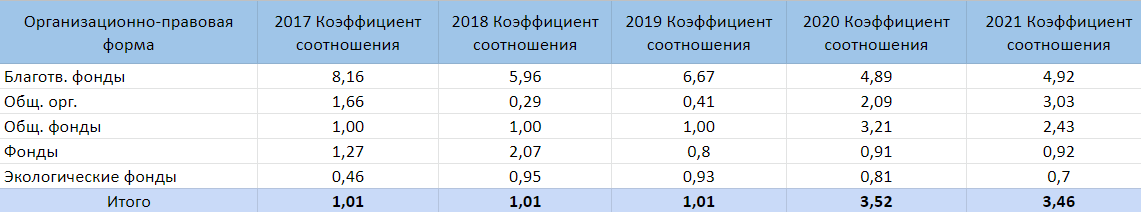

In [22]:
from IPython.display import Image
Image("C:/python_files/table_koef_debit_credit.png")

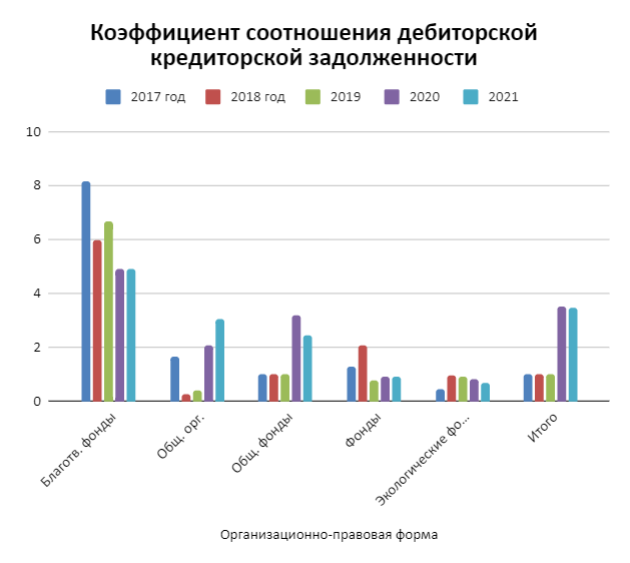

In [23]:
Image("C:/python_files/graph_koef_debit_credit.png")

## Вывод по гипотезе 3

Коэффициент соотношения дебиторской и кредиторской задолженности показывет насколько дебиторская задолженность покрывает кредиторскую. Для наиболее устойчивого финансовго положения организации, **оптимальным значением соотношения является показатель в пределах 0,9 - 1,0**, кредиторская задолженность не должна превышать дебиторскую. Вместе с тем, в случаях, когда дебиторская задолженность значительно превышает кредиторскую это также может говорить о риске нарушения финансовой устойчивости, так как для того, чтобы погашать текущие расходы, кредиты, организации необходимо изыскивать дополнительные средства. 

При анализе коэффициента соотношения дебиторской и кредиторской задолженности НКО по организационно-правовым формам и по годам, были выявлены следующие закономерности. 

**Самые высокие коэффициенты соотношения по всем годам у благотворительных фондов (4,92 - 8,16)**. Это может говорить о высоком уровне дебиторской задолженности у благотворительных фондов, о наличии проблем со своевременным ее погашением. Также данный показатель может свидетельствовать об отсутствии системы работы с должниками. Это может быть следствием нехватки персонала благотворительных фондов либо недостаточной их квалификации. 

Остальные организации имеют показатель соотношения дебиторской/кредиторской задолженности в пределах нормы. 

Анализ итоговых показателей говорит о том, что в целом в 2017-2018 гг. ситуация с дебиторской/кредиторской задолженностью в НКО была контролируемой. Однако в 2020-2021 гг. коэффициент был выше 3. Это может быть связано с пандемией Covid-19, которая изменила ситуацию с пожертвованиями и их расходованием.

# Гипотеза 4

***Выявить и исследовать наличие зависимости финансирования НКО и их финансового потенциала от организационно-правовой формы.***

## Способ проверки

***Сравнительный анализ и расчет коэффициента эффективности деятельности НКО c группировкой по организационно-правовой форме в Power BI.***

## Решение

Отчет Power BI с интерактивными дашбордами, в котором проводилось исследование, можно по этой ссылке https://app.powerbi.com/groups/me/reports/5b48190f-2e17-492e-8193-f873bbdabab9/ReportSection939bb821639a49946882?ctid=6a4dee01-c3f5-4d4b-bdd2-9e1f1482ac5d

Основная категория исследования — финансовый потенциал, который охватывает отношение всех поступлений ко всем расходам. Показатель эффективности деятельности некоммерческой организации можно рассчитать по формуле:

**К = Ф / Р** , где

Ф — сумма поступивших средств из всех источников за год;

Р — совокупные расходы за год.

Данный показатель универсален и может быть использован различными некоммерческими организациями в силу соблюдения требования размерности (соотносимые величины выражены в стоимостной форме).
 
Коэффициент финансовой устойчивости демонстрирует, насколько активы компании профинансированы за счет надежных и долгосрочных источников, и чем ближе его значение к 1, тем стабильнее положение компании. Нормативное для стабильной хоз.деятельности значение коэффициента финансовой устойчивости — в пределах от 0,8 до 0,9. 

Ниже представлены скриншоты таблиц и графиков с выводами.

*Значения "Поступило" и "Использовано" ниже соответствуют статьям "Всего поступило средств" и "Всего использовано средств" в исходных данных.*

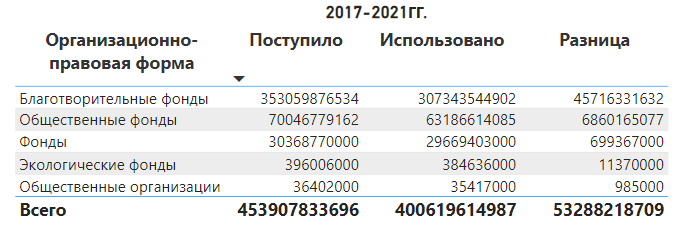

In [24]:
Image("C:/python_files/table_received_and_used.png")

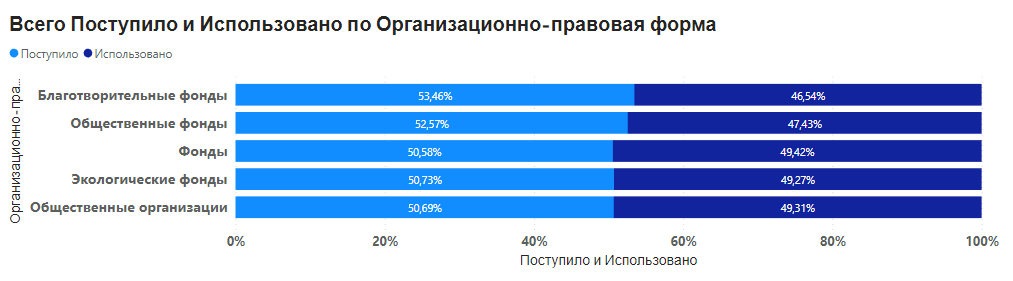

In [25]:
Image("C:/python_files/graph_received_and_used.png")

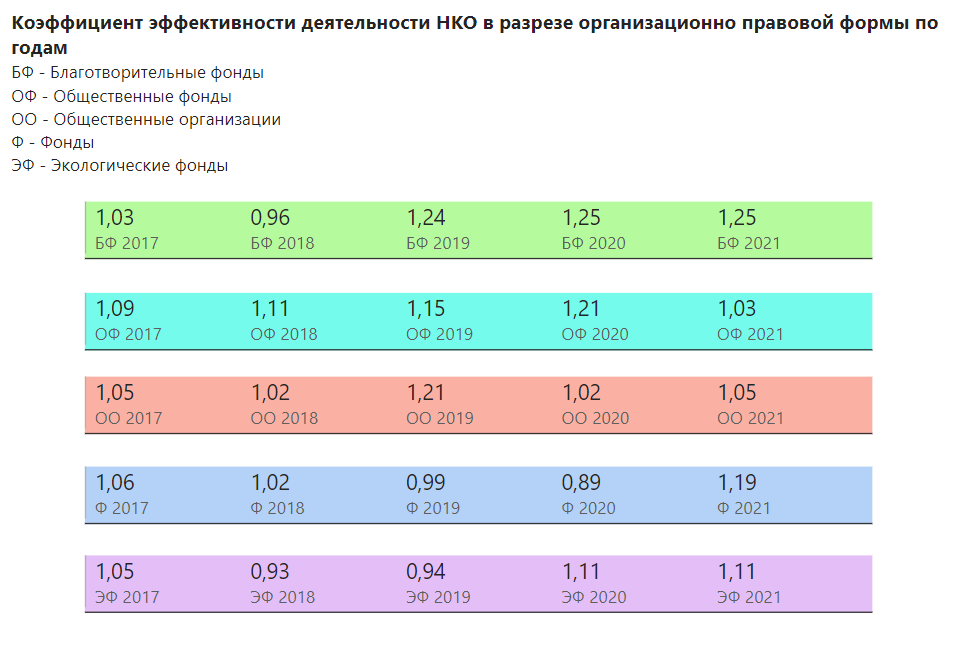

In [26]:
Image("C:/python_files/graph_koef_effective_nko_po_opf.png")

## Вывод по гипотезе 4

У НКО всех видов организационно-правовой формы данный коэффициент близок к 1, что говорит о достаточно устойчивой финансовой модели, имеющей долгосрочные стабильные источники финансирования. 

Самые стабильные показатели у благотворительных фондов, общественных фондов и общественных организаций.

Чуть пониже показатели у фондов и экологических фондов. Предположительно, это связано с особенностями ведения деятельности, т.к. направленность работы фондов - медицина, спорт, строительство, региональное развитие, а экологических фондов - экология.



# Гипотеза 5

***Определить, есть ли зависимость  между среднесписочной численностью работников НКО и основными финансовыми показателями (денежные средства и их эквиваленты, капитал и резервы, всего поступивших средств).***

## Способ проверки

***Провести кластерный анализ и посмотреть корреляцию между среднесписочной численностью работников (ССЧ) и финансовыми показателями НКО в 2017 г. и 2018 г. отдельно, а также для 50 НКО (у которых есть ССЧ за оба года) в 2017-2018 гг.***

## Решение

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
average_employees = pd.read_excel('C:/python_files/nko.xlsx', 
                                  sheet_name='Исходные данные', 
                                  usecols = "A:H")
# выгрузил нужные столбцы

In [29]:
average_employees.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1167700057568,2016-05-24 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1157700001140,2015-01-23 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN
2,"1ПОМОГАЕТ, БФ",1167700056347,2016-04-28 00:00:00,Действующая,Москва,Благотворительные фонды,0 - 5,NaN
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1197700012080,2019-08-13 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN
4,"459 ОРСПН, ФОНД",1217700471890,2021-10-06 00:00:00,Действующая,Москва,Благотворительные фонды,NaN,NaN


In [30]:
average_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Наименование                                  11162 non-null  object
 1   Регистрационный номер                         11162 non-null  int64 
 2   Дата регистрации                              11162 non-null  object
 3   Статус                                        11162 non-null  object
 4   Регион регистрации                            11162 non-null  object
 5   Организационно-правовая форма                 11162 non-null  object
 6   2017, Среднесписочная численность работников  2613 non-null   object
 7   2018, Среднесписочная численность работников  54 non-null     object
dtypes: int64(1), object(7)
memory usage: 697.8+ KB


In [31]:
average_employees_2017 = average_employees[average_employees['2017, Среднесписочная численность работников']\
                                        .notnull()]\
                                        .drop(['2018, Среднесписочная численность работников'], axis=1)
# фильтровал 2017 год отдельно от всего, удалил ненужные столбцы

In [32]:
average_employees_2018 = average_employees[average_employees['2018, Среднесписочная численность работников']\
                                        .notnull()]\
                                        .drop(['2017, Среднесписочная численность работников'], axis=1)
# фильтровал 2018 год отдельно от всего, удалил ненужные столбцы

In [33]:
average_employees_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 2 to 11156
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Наименование                                  2613 non-null   object
 1   Регистрационный номер                         2613 non-null   int64 
 2   Дата регистрации                              2613 non-null   object
 3   Статус                                        2613 non-null   object
 4   Регион регистрации                            2613 non-null   object
 5   Организационно-правовая форма                 2613 non-null   object
 6   2017, Среднесписочная численность работников  2613 non-null   object
dtypes: int64(1), object(6)
memory usage: 163.3+ KB


In [34]:
average_employees_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 6 to 10871
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Наименование                                  54 non-null     object
 1   Регистрационный номер                         54 non-null     int64 
 2   Дата регистрации                              54 non-null     object
 3   Статус                                        54 non-null     object
 4   Регион регистрации                            54 non-null     object
 5   Организационно-правовая форма                 54 non-null     object
 6   2018, Среднесписочная численность работников  54 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.4+ KB


In [35]:
average_employees_gen = pd.merge(average_employees_2017, average_employees_2018,
                                 on=['Наименование', 'Регистрационный номер', 'Дата регистрации',
                                    'Статус', 'Регион регистрации','Организационно-правовая форма'],
                                 how='left')
# объединил в один датафрейм

In [36]:
average_employees_gen.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников"
0,"1ПОМОГАЕТ, БФ",1167700056347,2016-04-28 00:00:00,Действующая,Москва,Благотворительные фонды,0 - 5,NaN
1,"5541 ДОБРО, БФ",1147799011612,2014-07-22 00:00:00,Действующая,Москва,Благотворительные фонды,11 - 15,51 - 100
2,"А.УСМАНОВА, ФОНД",1027729004269,2002-09-24 00:00:00,Действующая,Москва,Благотворительные фонды,0 - 5,NaN
3,"АВИАЦИОННО-КОСМИЧЕСКИЙ ФОНД, МОФ",1037746023061,2003-12-24 00:00:00,Действующая,Москва,Общественные фонды,0 - 5,NaN
4,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",1037739896226,2003-10-07 00:00:00,Действующая,Москва,Общественные фонды,11 - 15,51 - 100


In [37]:
average_employees_gen['Статус'].unique()

array(['Действующая', 'Реорганизуется', 'Ликвидируется'], dtype=object)

In [38]:
average_employees_gen[average_employees_gen['Статус']=='Действующая']['2017, Среднесписочная численность работников']\
                        .value_counts()
# по 2017 году посчитал количество НКО по численности

0 - 5        2320
11 - 15       137
6 - 10        105
51 - 100       37
101 - 150       6
151 - 200       4
201 - 250       1
251 - 500       1
Name: 2017, Среднесписочная численность работников, dtype: int64

In [39]:
average_employees_gen[average_employees_gen['Статус']=='Действующая']['2018, Среднесписочная численность работников']\
                        .value_counts()
# по 2018 году посчитал количество НКО по численности

51 - 100       37
101 - 150       7
151 - 200       2
201 - 250       2
501 - 1 000     1
251 - 500       1
Name: 2018, Среднесписочная численность работников, dtype: int64

In [40]:
average_employees_gen[average_employees_gen['Статус']=='Действующая']['2017, Среднесписочная численность работников']\
                        .value_counts()\
                        .describe()
# по 2017 смотрел стат параметры

count       8.00000
mean      326.37500
std       807.23973
min         1.00000
25%         3.25000
50%        21.50000
75%       113.00000
max      2320.00000
Name: 2017, Среднесписочная численность работников, dtype: float64

In [41]:
average_employees_gen[average_employees_gen['Статус']=='Действующая']['2018, Среднесписочная численность работников']\
                        .value_counts()\
                        .describe()
# по 2018 смотрел стат параметры

count     6.000000
mean      8.333333
std      14.222049
min       1.000000
25%       1.250000
50%       2.000000
75%       5.750000
max      37.000000
Name: 2018, Среднесписочная численность работников, dtype: float64

In [42]:
employees_2017_2018 = average_employees_gen[average_employees_gen['2018, Среднесписочная численность работников'].notnull()]
employees_2017_2018.head()
# фильтровал по наличию данных в обоих столбцах за 2017-2018 г.

,Наименование,Регистрационный номер,Дата регистрации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников"
1,"5541 ДОБРО, БФ",1147799011612,2014-07-22 00:00:00,Действующая,Москва,Благотворительные фонды,11 - 15,51 - 100
4,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",1037739896226,2003-10-07 00:00:00,Действующая,Москва,Общественные фонды,11 - 15,51 - 100
14,"АРИФМЕТИКА ДОБРА, БФ",1147799003770,2014-03-11 00:00:00,Действующая,Москва,Благотворительные фонды,51 - 100,51 - 100
54,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД РАЗВИТИЯ ФИЛАНТРОПИИ,1127799000560,2012-01-16 00:00:00,Действующая,Москва,Благотворительные фонды,11 - 15,51 - 100
78,"ВЕРА, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1067799030826,2006-11-28 00:00:00,Действующая,Москва,Благотворительные фонды,51 - 100,51 - 100


In [43]:
employees_2017_2018['Динамика численности'] = np.where(employees_2017_2018['2017, Среднесписочная численность работников']==employees_2017_2018['2018, Среднесписочная численность работников'],
                                            'без изменений',np.where(employees_2017_2018['2017, Среднесписочная численность работников']<employees_2017_2018['2018, Среднесписочная численность работников'],
                                                                    'рост', 'уменьшение'))
employees_2017_2018.head()
# добавил параметр динамика изменения численности

C:\Users\79057\AppData\Local\Temp\ipykernel_15964\3306108463.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Наименование,Регистрационный номер,Дата регистрации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников",Динамика численности
1,"5541 ДОБРО, БФ",1147799011612,2014-07-22 00:00:00,Действующая,Москва,Благотворительные фонды,11 - 15,51 - 100,рост
4,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",1037739896226,2003-10-07 00:00:00,Действующая,Москва,Общественные фонды,11 - 15,51 - 100,рост
14,"АРИФМЕТИКА ДОБРА, БФ",1147799003770,2014-03-11 00:00:00,Действующая,Москва,Благотворительные фонды,51 - 100,51 - 100,без изменений
54,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД РАЗВИТИЯ ФИЛАНТРОПИИ,1127799000560,2012-01-16 00:00:00,Действующая,Москва,Благотворительные фонды,11 - 15,51 - 100,рост
78,"ВЕРА, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1067799030826,2006-11-28 00:00:00,Действующая,Москва,Благотворительные фонды,51 - 100,51 - 100,без изменений


In [44]:
employees_2017_2018['Динамика численности'].value_counts()
# посчитал НКО по данному параментру

рост             23
без изменений    22
уменьшение        5
Name: Динамика численности, dtype: int64

In [45]:
average_employees_gen[average_employees_gen['Статус']=='Действующая'].head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников"
0,"1ПОМОГАЕТ, БФ",1167700056347,2016-04-28 00:00:00,Действующая,Москва,Благотворительные фонды,0 - 5,NaN
1,"5541 ДОБРО, БФ",1147799011612,2014-07-22 00:00:00,Действующая,Москва,Благотворительные фонды,11 - 15,51 - 100
2,"А.УСМАНОВА, ФОНД",1027729004269,2002-09-24 00:00:00,Действующая,Москва,Благотворительные фонды,0 - 5,NaN
3,"АВИАЦИОННО-КОСМИЧЕСКИЙ ФОНД, МОФ",1037746023061,2003-12-24 00:00:00,Действующая,Москва,Общественные фонды,0 - 5,NaN
4,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",1037739896226,2003-10-07 00:00:00,Действующая,Москва,Общественные фонды,11 - 15,51 - 100


In [46]:
employees_pivot_2017 = pd.pivot_table(average_employees_gen[average_employees_gen['Статус']=='Действующая'],
                                      index='2017, Среднесписочная численность работников',
                                      columns='Организационно-правовая форма',
                                      values='Регистрационный номер',
                                      aggfunc='count',
                                      fill_value=0)
employees_pivot_2017
# сводная по 2017 г. по типам фондов

Организационно-правовая форма,Благотворительные фонды,Общественные организации,Общественные фонды,Фонды,Экологические фонды
"2017, Среднесписочная численность работников",,,,,
0 - 5,1859,1,444,7,9
101 - 150,6,0,0,0,0
11 - 15,113,0,22,2,0
151 - 200,3,0,0,1,0
201 - 250,1,0,0,0,0
251 - 500,1,0,0,0,0
51 - 100,28,0,8,1,0
6 - 10,77,0,26,1,1


In [47]:
employees_pivot_2018 = pd.pivot_table(average_employees_gen[average_employees_gen['Статус']=='Действующая'],
                                      index='2018, Среднесписочная численность работников',
                                      columns='Организационно-правовая форма',
                                      values='Регистрационный номер',
                                      aggfunc='count',
                                      fill_value=0)
employees_pivot_2018
# сводная по 2017 г. по типам фондов

Организационно-правовая форма,Благотворительные фонды,Общественные фонды,Фонды
"2018, Среднесписочная численность работников",,,
101 - 150,6,0,1
151 - 200,2,0,0
201 - 250,2,0,0
251 - 500,1,0,0
501 - 1 000,1,0,0
51 - 100,31,5,1


## Выводы: 

По 2017 году: 
- 88,85% НКО показали, что в их составе от 0 до 5 работников
- На крупные НКО (более 100 работников) приходится лишь 0,4%
- Основная доля фондов с персоналом в диапазоне 0-5 - благотворительные и общественные фонды

По 2018 году:
- НКО становятся крупнее, малых НКО в принципе нет, численность начинается от 50 человек
- Больше всего преобладают благотворительные фонды

Для НКО указавших численность в 2017-2018 г.:
- в 46%  НКО заметен рост численности работников
- в 44% НКО численность не менялась

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
year_2017 = pd.read_excel('C:/python_files/nko.xlsx', 
                                    sheet_name='Исходные данные', 
                                    usecols = "B, G, S, N, BL")
# выгрузил нужные столбцы

In [50]:
year_2017.head()

,Регистрационный номер,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2017, Всего поступило средств, RUB"
0,1167700057568,NaN,NaN,NaN,NaN
1,1157700001140,NaN,294000.0,264000.0,24597000.0
2,1167700056347,0 - 5,19000.0,133000.0,1533000.0
3,1197700012080,NaN,NaN,NaN,NaN
4,1217700471890,NaN,NaN,NaN,NaN


In [51]:
year_2017['2017, Среднесписочная численность работников'].unique()

array([nan, '0 - 5', '11 - 15', '51 - 100', '6 - 10', '201 - 250',
       '101 - 150', '251 - 500', '151 - 200'], dtype=object)

In [52]:
year_2017['group'] = np.where(year_2017['2017, Среднесписочная численность работников']=='0 - 5', 1,
                              np.where(year_2017['2017, Среднесписочная численность работников']=='6 - 10', 2,
                              np.where(year_2017['2017, Среднесписочная численность работников']=='11 - 15', 3, 
                              np.where(year_2017['2017, Среднесписочная численность работников']=='51 - 100', 4,
                              np.where(year_2017['2017, Среднесписочная численность работников']=='101 - 150', 5,
                              np.where(year_2017['2017, Среднесписочная численность работников']=='151 - 200', 6,
                              np.where(year_2017['2017, Среднесписочная численность работников']=='201 - 250', 7,
                              np.where(year_2017['2017, Среднесписочная численность работников']=='251 - 500', 8, 0))))))))

In [53]:
year_2017 = year_2017[year_2017['2017, Среднесписочная численность работников'].notnull()]
year_2017.head()                    

,Регистрационный номер,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2017, Всего поступило средств, RUB",group
2,1167700056347,0 - 5,19000.0,133000.0,1533000.0,1
6,1147799011612,11 - 15,180424000.0,180424000.0,754602000.0,3
15,1027729004269,0 - 5,2610000.0,3094000.0,5000000.0,1
23,1037746023061,0 - 5,22000.0,45000.0,NaN,1
33,1037739896226,11 - 15,4288000.0,676000.0,27002000.0,3


In [54]:
year_2017_WO_employees = year_2017.drop('2017, Среднесписочная численность работников', axis=1)

In [55]:
X = year_2017_WO_employees.values[:, 1:]
X = np.nan_to_num(X)
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[-0.08525829, -0.09055943, -0.14378823, -0.31520902],
       [ 2.32887954,  0.55053986,  4.55561105,  2.69627603],
       [-0.05058613, -0.08003037, -0.122153  , -0.31520902],
       ...,
       [-0.06448978, -0.07496674, -0.05934408, -0.31520902],
       [-0.08549916, -0.09103236, -0.15335465, -0.31520902],
       [-0.08548578, -0.09102525, -0.15329225, -0.31520902]])

In [56]:
from sklearn.cluster import KMeans
cluster_num = 5
k_means = KMeans(init='k-means++',
                 n_clusters=cluster_num,
                 n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [57]:
year_2017['Clus_km'] = labels

In [58]:
fig = px.scatter(year_2017, x="group", y="2017, Денежные средства и денежные эквиваленты, RUB", color="Clus_km")
fig.show()

In [59]:
fig = px.scatter(year_2017, x="group", y="2017, Капитал и резервы, RUB", color="Clus_km")
fig.show()

In [60]:
fig = px.scatter(year_2017, x="group", y="2017, Всего поступило средств, RUB", color="Clus_km")
fig.show()

In [61]:
year_2017.groupby('Clus_km')[['2017, Денежные средства и денежные эквиваленты, RUB', 
                             '2017, Капитал и резервы, RUB', '2017, Всего поступило средств, RUB']].count().transpose()

Clus_km,0,1,2,3,4
"2017, Денежные средства и денежные эквиваленты, RUB",1871,2,7,23,1
"2017, Капитал и резервы, RUB",1734,2,7,24,1
"2017, Всего поступило средств, RUB",1701,2,7,24,1


In [62]:
year_2017.groupby('Clus_km')[['2017, Денежные средства и денежные эквиваленты, RUB', 
                              '2017, Капитал и резервы, RUB',
                              '2017, Всего поступило средств, RUB']].describe().transpose()

Clus_km                                                              0  \
2017, Денежные средства и денежные эквиваленты,... count  1.871000e+03   
                                                   mean   3.917415e+06   
                                                   std    1.908071e+07   
                                                   min   -3.231000e+06   
                                                   25%    3.100000e+04   
                                                   50%    2.110000e+05   
                                                   75%    1.367500e+06   
                                                   max    4.161730e+08   
2017, Капитал и резервы, RUB                       count  1.734000e+03   
                                                   mean   1.137348e+07   
                                                   std    4.445930e+07   
                                                   min   -1.340540e+08   
                                                   25%    3.300000e+04   
                                                   50%    3.980000e+05   
                                                   75%    3.756000e+06   
                                                   max    5.825030e+08   
2017, Всего поступило средств, RUB                 count  1.701000e+03   
                                                   mean   2.011274e+07   
                                                   std    6.848316e+07   
                                                   min   -8.799000e+06   
                                                   25%    5.950000e+05   
                                                   50%    2.288000e+06   
                                                   75%    9.565000e+06   
                                                   max    9.215530e+08   

Clus_km                                                              1  \
2017, Денежные средства и денежные эквиваленты,... count  2.000000e+00   
                                                   mean   1.727540e+08   
                                                   std    1.808666e+08   
                                                   min    4.486200e+07   
                                                   25%    1.088080e+08   
                                                   50%    1.727540e+08   
                                                   75%    2.367000e+08   
                                                   max    3.006460e+08   
2017, Капитал и резервы, RUB                       count  2.000000e+00   
                                                   mean   9.022636e+09   
                                                   std    2.809130e+08   
                                                   min    8.824001e+09   
                                                   25%    8.923319e+09   
                                                   50%    9.022636e+09   
                                                   75%    9.121954e+09   
                                                   max    9.221272e+09   
2017, Всего поступило средств, RUB                 count  2.000000e+00   
                                                   mean   4.672500e+07   
                                                   std    3.814841e+07   
                                                   min    1.975000e+07   
                                                   25%    3.323750e+07   
                                                   50%    4.672500e+07   
                                                   75%    6.021250e+07   
                                                   max    7.370000e+07   

Clus_km                                                              2  \
2017, Денежные средства и денежные эквиваленты,... count  7.000000e+00   
                                                   mean   1.081299e+08   
                                                   std    6.837299e+07   
  

## Выводы

По нашим данным за 2017 г. можно сделать следующие выводы:
- большая часть всех НКО попадает в 1 кластер, в остальных кластерах заметно меньше НКО
- зависимости увеличения параметров финансового благополучия от численности НКО не обнаружено
- отчётливо видно, что наибольшее количество средств у НКО с ССЧ до 15 человек, далее чем выше ССЧ доходы падают

In [63]:
year_2018 = pd.read_excel('C:/python_files/nko.xlsx', 
                                    sheet_name='Исходные данные', 
                                    usecols = "B, H, O, T, BM")
# выгрузил нужные столбцы

In [64]:
year_2018.head()

,Регистрационный номер,"2018, Среднесписочная численность работников","2018, Денежные средства и денежные эквиваленты, RUB","2018, Капитал и резервы, RUB","2018, Всего поступило средств, RUB"
0,1167700057568,NaN,NaN,NaN,NaN
1,1157700001140,NaN,193000.0,203000.0,37514000.0
2,1167700056347,NaN,1154000.0,1219000.0,3635000.0
3,1197700012080,NaN,NaN,NaN,NaN
4,1217700471890,NaN,NaN,NaN,NaN


In [65]:
year_2018['2018, Среднесписочная численность работников'].unique()

array([nan, '51 - 100', '101 - 150', '151 - 200', '501 - 1 000',
       '251 - 500', '201 - 250'], dtype=object)

In [66]:
year_2018['group'] = np.where(year_2018['2018, Среднесписочная численность работников']=='51 - 100', 1,
                              np.where(year_2018['2018, Среднесписочная численность работников']=='101 - 150', 2,
                              np.where(year_2018['2018, Среднесписочная численность работников']=='151 - 200', 3, 
                              np.where(year_2018['2018, Среднесписочная численность работников']=='201 - 250', 4,
                              np.where(year_2018['2018, Среднесписочная численность работников']=='251 - 500', 5,
                              np.where(year_2018['2018, Среднесписочная численность работников']=='501 - 1 000', 6, 0))))))

In [67]:
year_2018 = year_2018[year_2018['2018, Среднесписочная численность работников'].notnull()]
year_2018.head()

,Регистрационный номер,"2018, Среднесписочная численность работников","2018, Денежные средства и денежные эквиваленты, RUB","2018, Капитал и резервы, RUB","2018, Всего поступило средств, RUB",group
6,1147799011612,51 - 100,20352000.0,20352000.0,248596000.0,1
33,1037739896226,51 - 100,553000.0,2008000.0,25410000.0,1
112,1147799003770,51 - 100,3440000.0,88649000.0,105573000.0,1
423,1127799000560,51 - 100,92619000.0,95937000.0,192711000.0,1
613,1067799030826,51 - 100,60529000.0,271591000.0,392217000.0,1


In [68]:
year_2018_WO_employees = year_2018.drop('2018, Среднесписочная численность работников', axis=1)

In [69]:
X = year_2018_WO_employees.values[:, 1:]
X = np.nan_to_num(X)
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[-1.67835608e-01, -2.57111115e-01, -1.38644638e-01,
        -4.51236587e-01],
       [-2.14256169e-01, -3.01400993e-01, -4.18720582e-01,
        -4.51236587e-01],
       [-2.07487334e-01, -9.22143765e-02, -3.18124093e-01,
        -4.51236587e-01],
       [ 1.60096503e-03, -7.46181800e-02, -2.08774683e-01,
        -4.51236587e-01],
       [-7.36369669e-02,  3.49482026e-01,  4.15852463e-02,
        -4.51236587e-01],
       [-1.88772807e-01, -2.08982331e-01, -3.48411087e-01,
        -4.51236587e-01],
       [-2.01670404e-01, -9.84290596e-02, -3.52951312e-01,
        -4.51236587e-01],
       [-1.85631055e-01, -2.53117687e-01, -4.07110254e-01,
        -4.51236587e-01],
       [-2.14729777e-01, -3.05882132e-01, -3.36182093e-01,
         4.85947094e-01],
       [-2.00793527e-01, -2.75574084e-01, -4.25530920e-01,
         1.42313078e+00],
       [-2.15541005e-01, -3.06249122e-01, -4.44929152e-01,
        -4.51236587e-01],
       [-1.41728585e-01, -2.07106337e-01, -2.50886592e-01,
      

In [70]:
cluster_num = 5
k_means = KMeans(init='k-means++',
                 n_clusters=cluster_num,
                 n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[4 4 4 4 0 4 4 4 4 4 4 4 4 4 2 0 2 3 0 2 0 4 4 4 0 4 4 4 4 0 4 4 4 4 0 4 0
 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 0]


In [71]:
year_2018['Clus_km'] = labels
year_2018.head()

,Регистрационный номер,"2018, Среднесписочная численность работников","2018, Денежные средства и денежные эквиваленты, RUB","2018, Капитал и резервы, RUB","2018, Всего поступило средств, RUB",group,Clus_km
6,1147799011612,51 - 100,20352000.0,20352000.0,248596000.0,1,4
33,1037739896226,51 - 100,553000.0,2008000.0,25410000.0,1,4
112,1147799003770,51 - 100,3440000.0,88649000.0,105573000.0,1,4
423,1127799000560,51 - 100,92619000.0,95937000.0,192711000.0,1,4
613,1067799030826,51 - 100,60529000.0,271591000.0,392217000.0,1,0


In [72]:
fig = px.scatter(year_2018, x="group", y="2018, Денежные средства и денежные эквиваленты, RUB", color="Clus_km")
fig.show()

In [73]:
fig = px.scatter(year_2018, x="group", y="2018, Капитал и резервы, RUB", color="Clus_km")
fig.show()

In [74]:
fig = px.scatter(year_2018, x="group", y="2018, Всего поступило средств, RUB", color="Clus_km")
fig.show()

In [75]:
year_2018.groupby('Clus_km')[['2018, Денежные средства и денежные эквиваленты, RUB', 
                             '2018, Капитал и резервы, RUB', '2018, Всего поступило средств, RUB']].count().transpose()

Clus_km,0,1,2,3,4
"2018, Денежные средства и денежные эквиваленты, RUB",9,1,3,1,39
"2018, Капитал и резервы, RUB",9,1,3,1,36
"2018, Всего поступило средств, RUB",9,1,3,1,38


In [76]:
year_2018.groupby('Clus_km')[['2018, Денежные средства и денежные эквиваленты, RUB', 
                             '2018, Капитал и резервы, RUB', '2018, Всего поступило средств, RUB']].describe().transpose()

Clus_km                                                              0  \
2018, Денежные средства и денежные эквиваленты,... count  9.000000e+00   
                                                   mean   3.775178e+07   
                                                   std    2.985059e+07   
                                                   min    8.805000e+06   
                                                   25%    1.156500e+07   
                                                   50%    3.902500e+07   
                                                   75%    4.747800e+07   
                                                   max    9.926400e+07   
2018, Капитал и резервы, RUB                       count  9.000000e+00   
                                                   mean   9.642489e+07   
                                                   std    7.884822e+07   
                                                   min    1.511200e+07   
                                                   25%    3.793400e+07   
                                                   50%    8.459000e+07   
                                                   75%    1.130570e+08   
                                                   max    2.715910e+08   
2018, Всего поступило средств, RUB                 count  9.000000e+00   
                                                   mean   4.596676e+08   
                                                   std    2.392765e+08   
                                                   min    2.667770e+08   
                                                   25%    3.260650e+08   
                                                   50%    3.922170e+08   
                                                   75%    4.392780e+08   
                                                   max    9.956360e+08   

Clus_km                                                              1  \
2018, Денежные средства и денежные эквиваленты,... count  1.000000e+00   
                                                   mean   3.100766e+09   
                                                   std             NaN   
                                                   min    3.100766e+09   
                                                   25%    3.100766e+09   
                                                   50%    3.100766e+09   
                                                   75%    3.100766e+09   
                                                   max    3.100766e+09   
2018, Капитал и резервы, RUB                       count  1.000000e+00   
                                                   mean   2.865046e+09   
                                                   std             NaN   
                                                   min    2.865046e+09   
                                                   25%    2.865046e+09   
                                                   50%    2.865046e+09   
                                                   75%    2.865046e+09   
                                                   max    2.865046e+09   
2018, Всего поступило средств, RUB                 count  1.000000e+00   
                                                   mean   3.482906e+09   
                                                   std             NaN   
                                                   min    3.482906e+09   
                                                   25%    3.482906e+09   
                                                   50%    3.482906e+09   
                                                   75%    3.482906e+09   
                                                   max    3.482906e+09   

Clus_km                                                              2  \
2018, Денежные средства и денежные эквиваленты,... count  3.000000e+00   
                                                   mean   3.671153e+08   
                                                   std    3.269336e+08   
  

## Выводы

По нашим данным за 2018 г. можно сделать следующие выводы:
- большая часть всех НКО попадает в 1 кластер, в остальных кластерах заметно меньше НКО
- зависимости увеличения параметров финансового благополучия от численности НКО не обнаружено
- отчётливо видно, что наибольшее количество средств у НКО с ССЧ до 50 человек, далее чем выше ССЧ доходы падают

# Гипотеза 6

***Оценить, как связно материальное благополучие НКО и среднесписочная численность работников.***

## Способ проверки 

**Сравнительный анализ в Power BI**

## Решение

Ссылка на отчет в Power BI, где проверялась эта и следующие гипотезы https://app.powerbi.com/groups/me/reports/8a5eb1ba-eb30-4b57-9fca-e371bdfbd776/ReportSection3cac26255f1a87c46b26?ctid=6a4dee01-c3f5-4d4b-bdd2-9e1f1482ac5d&bookmarkGuid=a6b79f54-8e97-4d7a-8b67-36f417404b0c

Оценка материального благополучия производилась на основании следующих показателей:

- Приобретение основных средств, инвентаря и иного имущества;
- Остаток средств на конец отчетного года;
- Денежные средства и денежные эквиваленты.


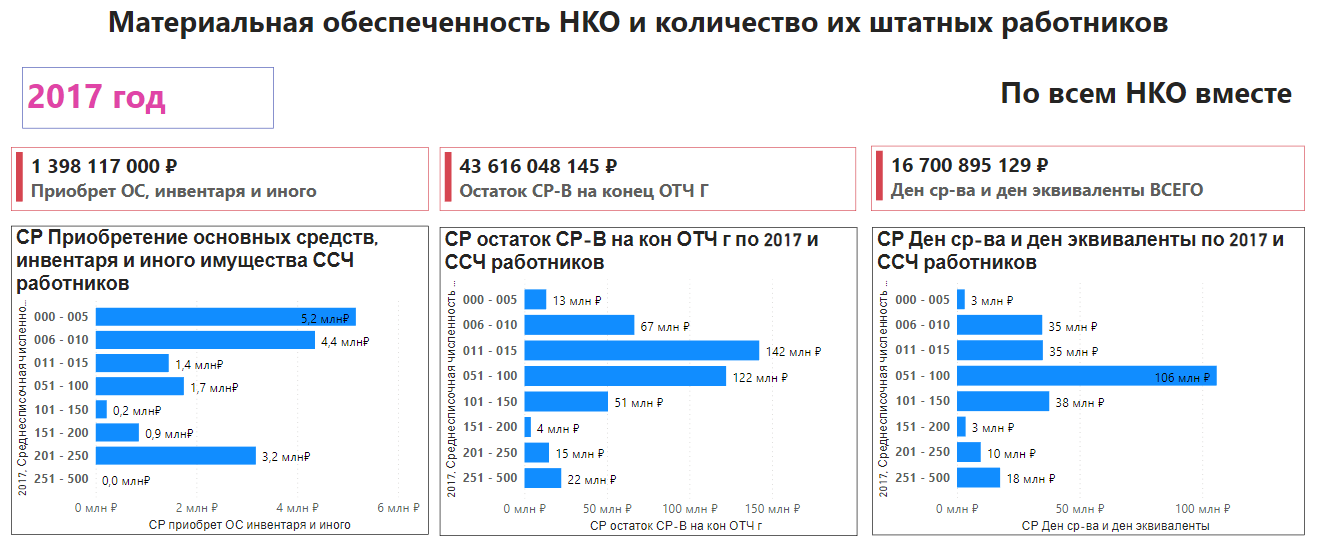

In [77]:
Image("C:/python_files/nko_workers_2017.png")

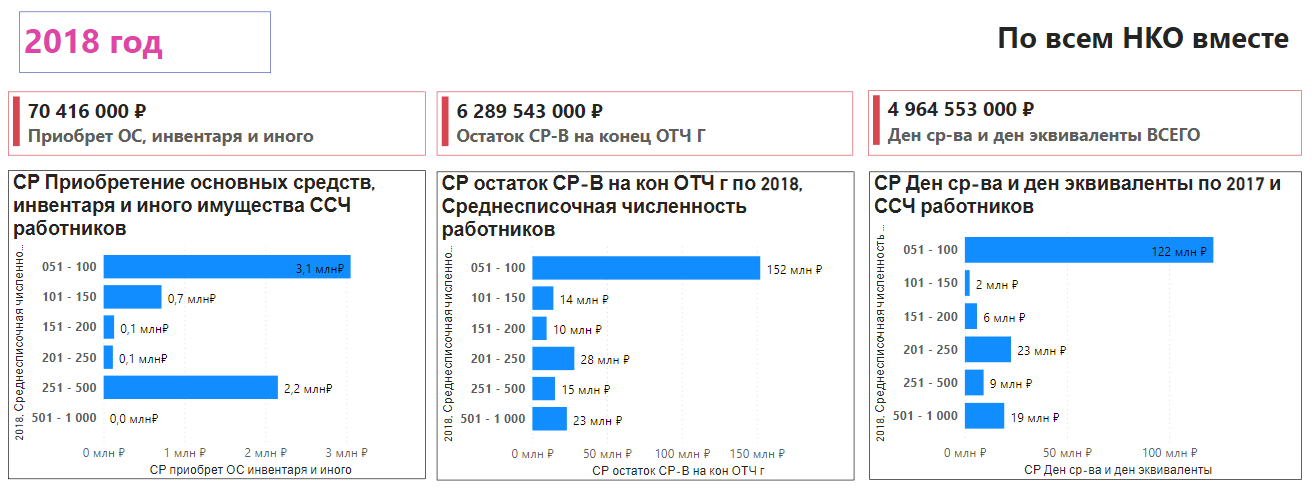

In [78]:
Image("C:/python_files/nko_workers_2018.png")

## Вывод по гипотезе 6

Анализ материального благополучия проводился исходя из выбранных показателей основываясь на том фактическом имуществе, которым владеет организация (остатки денежных средств на счетах и в кассе, объем приобретенных основных средств).

В 2017 году по показателю «Денежные средства и денежные эквиваленты» наиболее материально-благополучными являются НКО со среднесписочной численностью 51-100. По показателю «Остаток средств на конец отчетного года» такие НКО занимают 2-е место.

По показателям «Приобретение основных средств, инвентаря и имущества», «Остаток средств на конец отчетного года», «Денежные средства и денежные эквиваленты» (среднее значение) в 2018 году наиболее материально-благополучными являются НКО, у которых среднесписочная численность работников находится в диапазоне 51-100 человек.

НКО с численностью 51-100 человек можно отнести к средним. Отсюда следует, что НКО, которые имеют больше всего средств для погашения текущих обязательств это НКО среднего размера. Показатели более крупных НКО в разы ниже. Однако у нас нет данных за 2018 год по малым НКО с численностью менее 50 человек. 

**В целом можно сделать вывод, что наиболее материально-благополучными являются НКО с численностью 51-100 человек**, однако нет возможности проследить эту тенденцию дальше, так как у нас нет данных по среднесписочной численности в 2019-2021 гг.


# Гипотеза 7

***Оценить степень закредитованности НКО в разрезе организационно-правовых форм.***

## Способ проверки

***Сравнительный анализ в Power BI в динамике на основании трех показателей.***

## Решение

Для оценки закредитованности были взяты следующие показатели:

- Заемные средства;
- Проценты к уплате;
- Денежные средства и денежные эквиваленты.


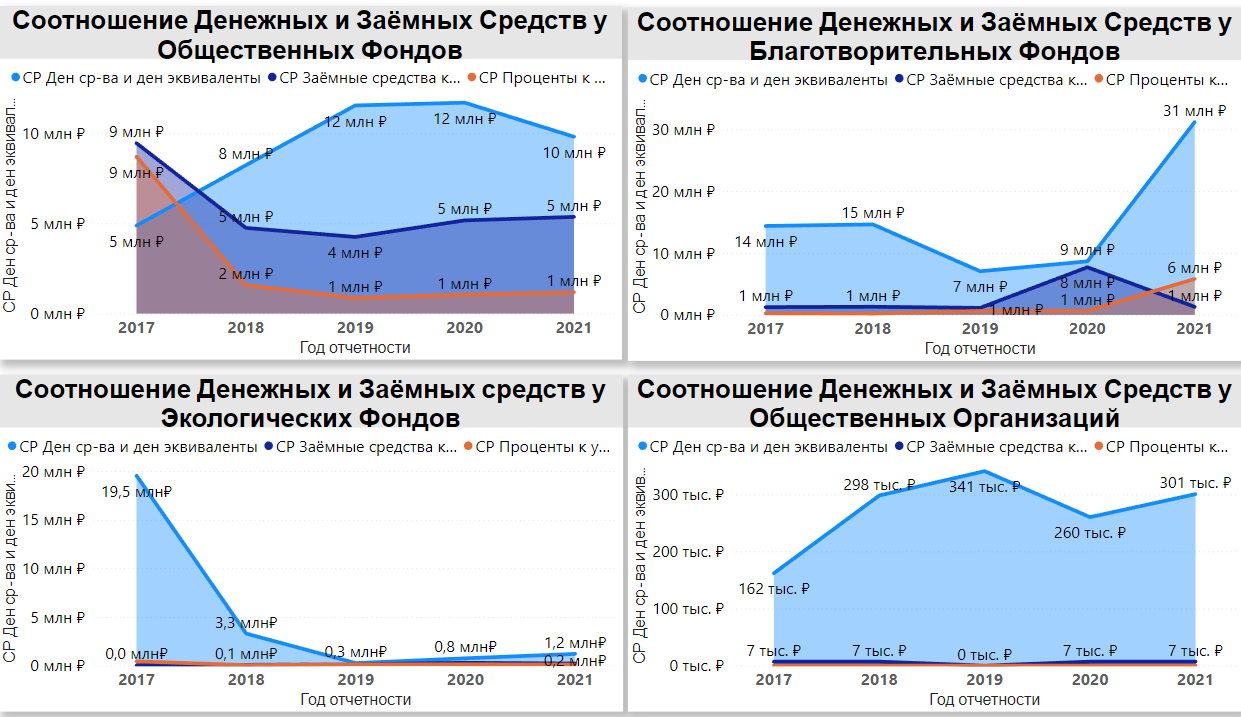

In [79]:
Image("C:/python_files/credit_nko1.png")

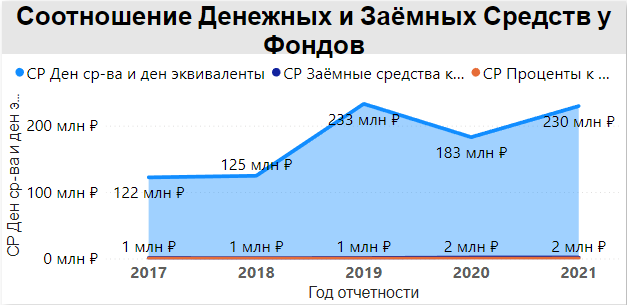

In [80]:
Image("C:/python_files/credit_nko2.png")

# Вывод по гипотезе 7

Анализ закредитованности НКО проводился в разрезе организационно-правовых форм (общественные фонды, благотворительные фонды, экологические фонды, общественные организации, фонды).

Исходя из информации, представленной на графиках видно, что у экологических фондов, общественных организаций и фондов объем заемных средств достаточно низкий. Это может быть связано с отсутствием достаточного финансирования со стороны банков, с их нежеланием кредитовать НКО.

У общественных и благотворительных фондов наблюдается рост заемных средств 
в 2020 году, что может быть связано с пандемией Covid-19 и необходимостью дополнительного финансирования деятельности этих НКО.

Объем заемных средств и уплаченных по ним процентам у общественных фондов был достаточно высоким в 2017 году и затем резко пошел на спад, что может говорить о возможности проведения государственных программы по краткосрочному кредитованию этих НКО в 2017 году. Анализ наличия таких программ не проводился.

**Зависимость между объемом денежных средств и денежных эквивалентов и объемом заемных средств не прослеживается.**


# Гипотеза 8

***Оценить зависимость объема заемных средств благотворительных фондов от их возраста (периода деятельности) в Москве и регионах.***

## Способ проверки

***Сравнительный анализ в Power BI.***

## Решение

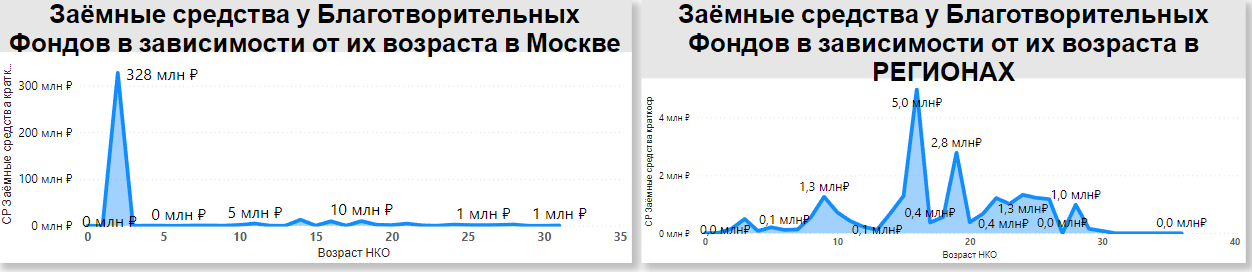

In [81]:
Image("C:/python_files/regions.png")

# Вывод по гипотезе 8

В Москве самыми закредитованными благотворительными фондами являются фонды, период осуществления деятельности которых менее 5 лет. Это может говорить о том, что возможно проводились или проводятся программы по льготному финансированию вновь созданных НКО на развитие каких-либо социально и общественно важных благотворительных программ. Вместе с тем, благотворительные фонды, которые старше пяти лет имеют довольно низкий уровень закредитованности, что целом свидетельствует о тенденции низкого уровня объема предоставленных кредитов.

Самыми закредитованными фондами в регионах являются фонды, возраст которых от 10 до 20 лет. Этот показатель может говорить в целом о низком уровне благотворительности в регионах, так как практически нет кредитов у молодых фондов, либо о невозможности получить кредитные (заемные) средства. 


# Гипотеза 9

***Определить, как менялось соотношение денежных и заемных средств НКО в динамике за 5 лет.***

## Способ проверки

***Сравнительный анализ в Power BI.***

## Решение


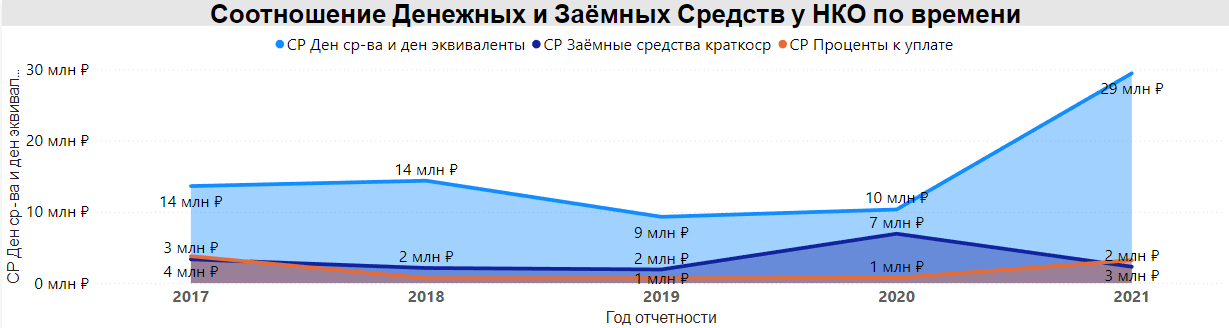

In [82]:
Image("C:/python_files/years_dynamic.png")

# Вывод по гипотезе 9

Рост объема заемных средств у НКО за последние 5 лет наблюдается в 2020 году, однако рост процентов по кредитам и займам наблюдается только к середине 2020 года – ближе к 2021, что может говорить о том, что предоставлялись льготные кредиты в период пандемии Covid-19 с отсрочкой уплаты процентов по этим кредитам. Для более полной информации о программах льготного кредитования необходимы данные о таких программах и об объемах такого кредитования. 

# Гипотеза 10

***Провести комплексную оценку финансового благополучия НКО.***

## Способ проверки

***Сравнительный анализ в Power BI.***

## Решение

Оценка финансового благополучия НКО проводилась на основании анализа ряда показателей, в том числе путем вычисления в динамике по годам отчетности:

- коэффициента эффективности деятельности НКО;
- коэффициента финансовой независимости НКО

Целью данного анализа было проверить, влияет ли регион деятельности и организационно-правовой формы НКО на:

- соотношение между дебиторской и кредиторской задолженностью в динамике;
- финансовые результаты НКО.

Определить взаимосвязь возраста НКО и показателей выручки прибыли от коммерческой и от приносящей доход деятельности.

Провести оценку доли заёмных средств и средств на конец отчетного периода в общем объеме капитала НКО и определить влияние организационно-правовой формы и региона деятельности на эти показатели.

#### Оценка финансового благополучия НКО 

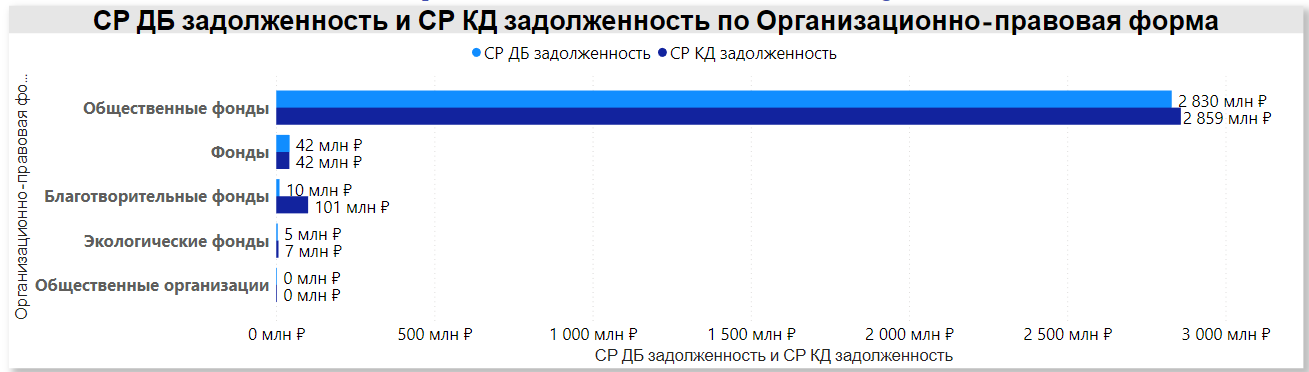

In [83]:
Image("C:/python_files/10_1.png")

На основании проведенного анализа финансового благополучия можно сделать вывод, что основной объем кредиторской и дебиторской задолженности приходится на общественные фонды. 

Также можно сделать вывод, что объем дебиторской задолженности значительно превышает кредиторскую у благотворительных фондов.


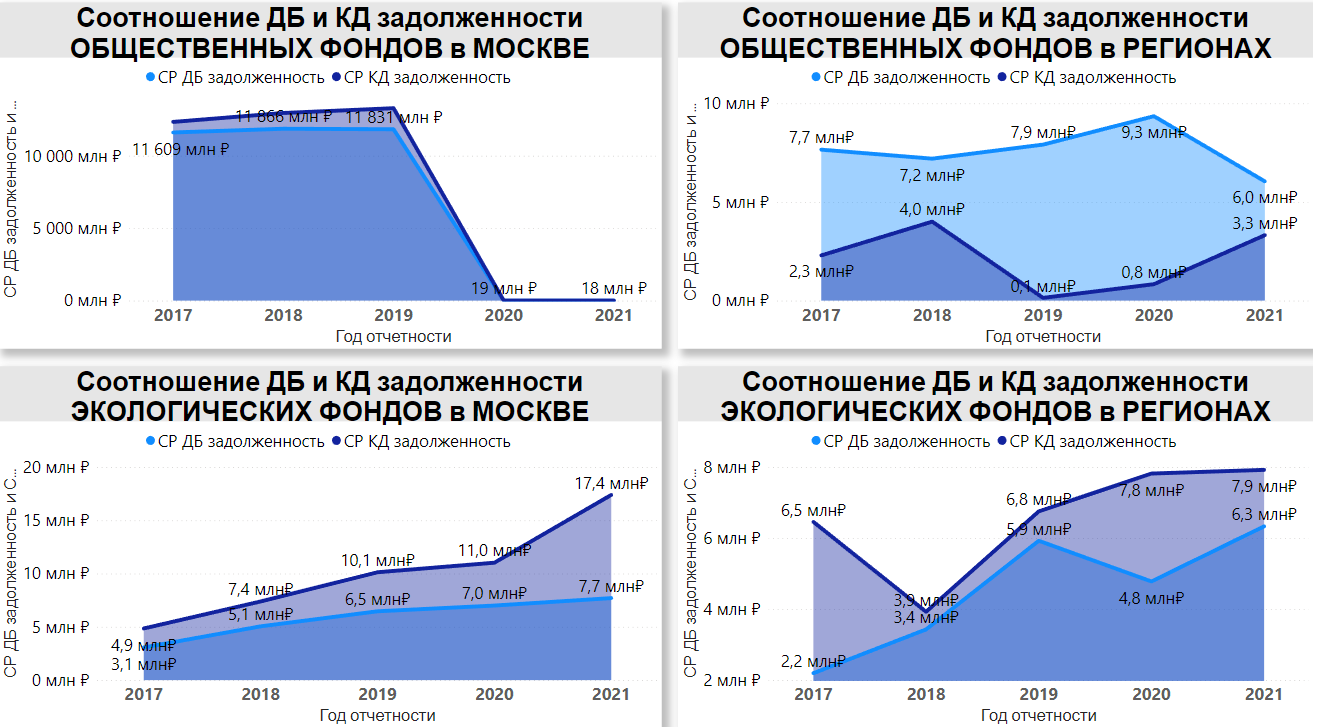

In [84]:
Image("C:/python_files/10_2.png")

В 2020 г. в общественных фондах Москвы наблюдается резкий спад объема кредиторской и дебиторской задолженности, а в общественных фондах регионов в это время можно заметить достаточно большой разрыв между дебиторской и кредиторской задолженностью, причем дебиторская задолженность значительно превышает кредиторскую. 

#### Анализ эффективности деятельности НКО

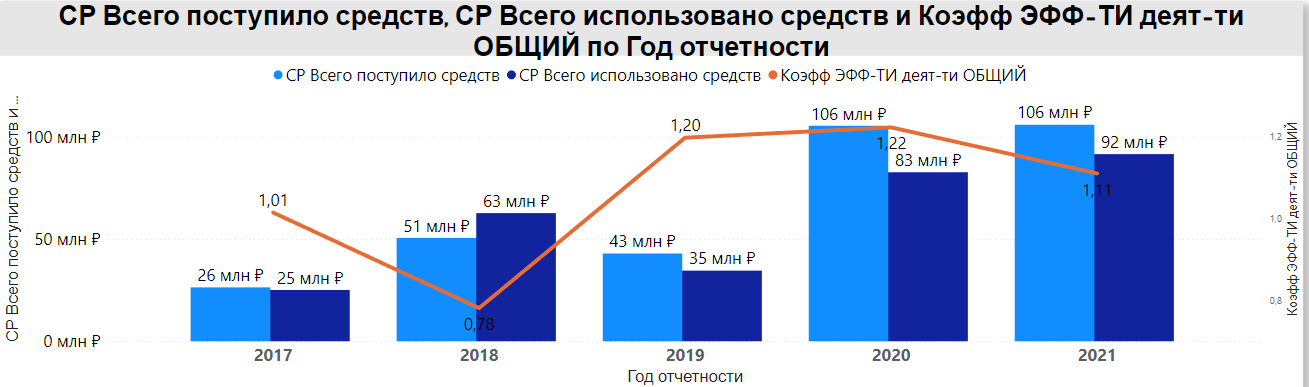

In [85]:
Image("C:/python_files/10_3.png")

Значительный рост поступлений средств целевого финансирования, а также рост их расходования наблюдается в 2020 году, это может быть связано с пандемией Covid-19. Также в 2021 году эта тенденция продолжает сохраняться.
 
Коэффициент эффективности деятельности, который определяется как соотношение всего поступивших средств целевого финансирования к их общему расходованию, значительно просел в 2018 году. Объем израсходованных средств целевого финансирования превысил их поступление. Это могло произойти в результате снижения интереса к НКО, либо в результате каких-то экономический потрясений. Однако далее наблюдается такой же резкий их рост. Для более детального анализа необходимо больше данных. 

#### Анализ финансовой независимости НКО

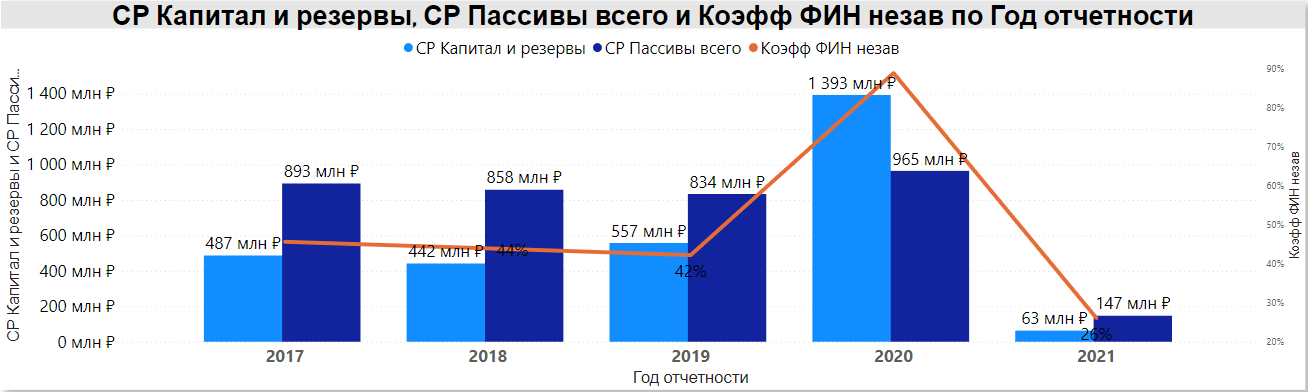

In [86]:
Image("C:/python_files/10_4.png")

Коэффициент финансовой независимости определяется как соотношение капитала и резервов к итогу баланса. Резкий рост коэффициента наблюдается в 2020 году, его величина составила около 90%, что говорит о достаточно высоком уровне финансовой устойчивости.

В 2021 наблюдается резкое снижение коэффициента финансовой независимости, что могло привести к снижению платежеспособности НКО. Это вероятно произошло под влиянием кризиса 2020 года.

#### Анализ финансовых результатов

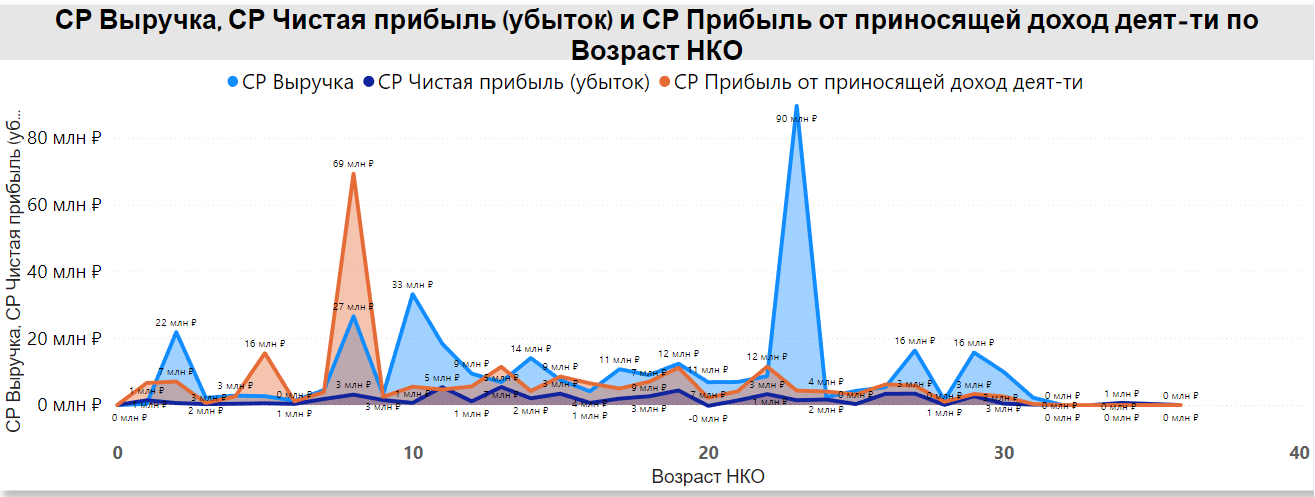

In [87]:
Image("C:/python_files/10_5.png")

В результате общего анализа показателей, характеризующих финансовые результаты НКО за последние 5 лет, можно сделать следующие выводы. Самый высокий показатель чистой прибыли у НКО период осуществления деятельности, которых до 10 лет. Вместе с тем, самый высокий показатель по выручке у организаций в пределах от 20 до 30 лет.

Закономерности между этими показателями не наблюдается, однако можно сделать вывод что, выручка тем выше, чем старше НКО, т.к. у таких НКО есть определенная репутация, узнаваемость и положительное мнение в обществе.

#### Анализ финансовых результатов деятельности НКО в Москве

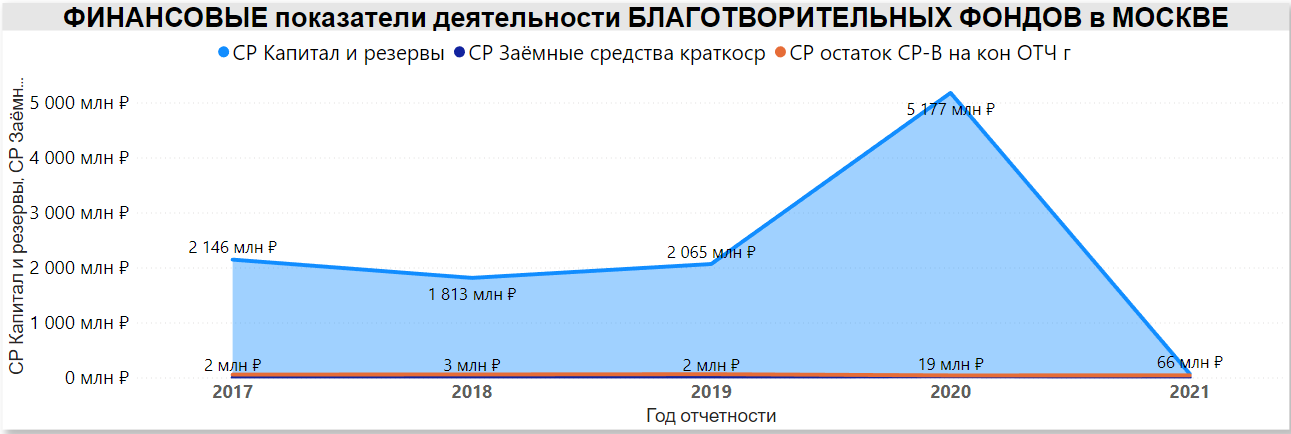

In [88]:
Image("C:/python_files/10_6.png")

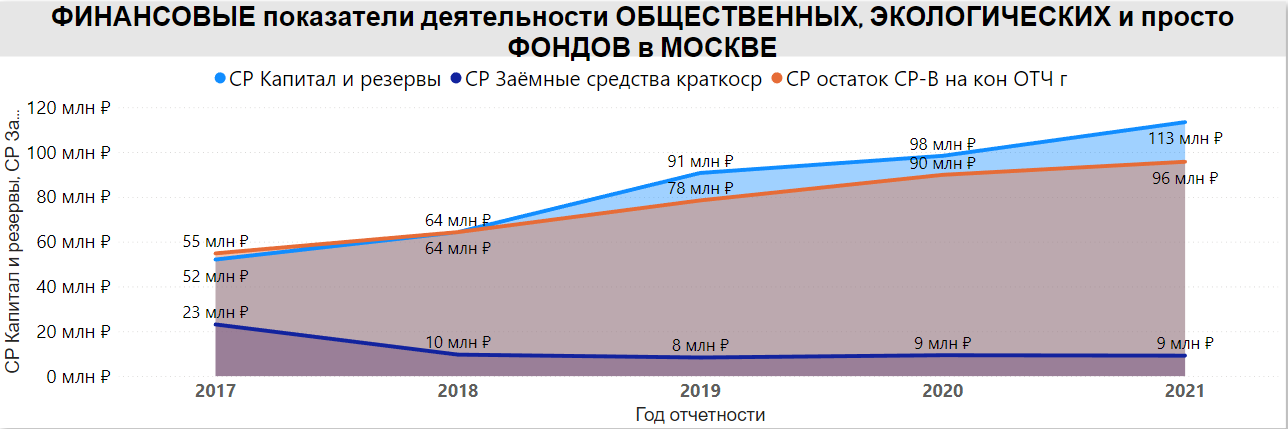

In [89]:
Image("C:/python_files/10_7.png")

На основании проведенного анализа финансовых результатов деятельности НКО в г. Москва в разрезе организационно-правовых форм можно сделать следующие выводы.

Не выявлено резких изменений (роста, падения) таких показателей, как капитал и резервы, заемные средства, остаток средств на конец отчетного года. 

Наблюдается постепенный рост показателей.

Закономерностей и аномалий не выявлено.

#### Анализ финансовых результатов деятельности НКО в регионах

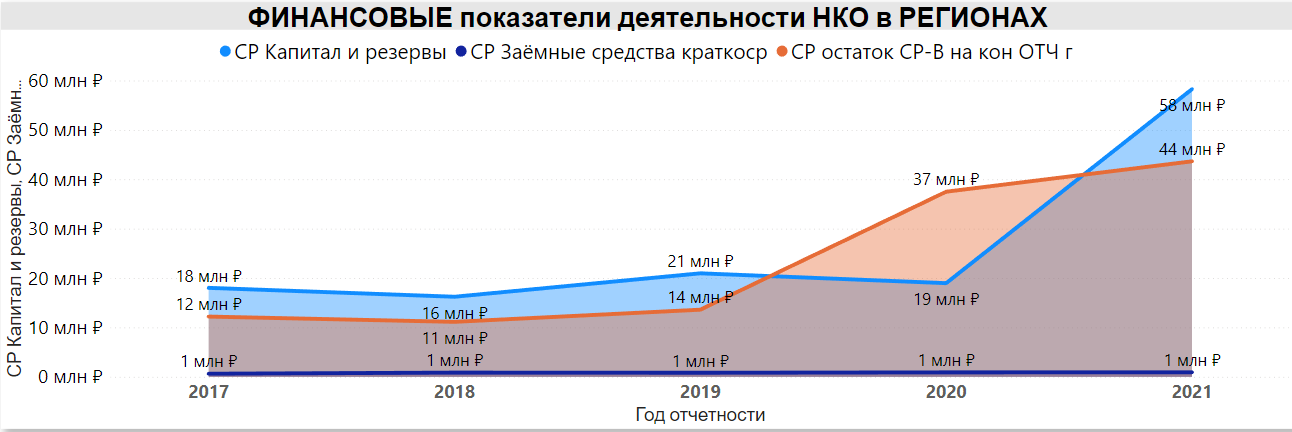

In [90]:
Image("C:/python_files/10_8.png")

Анализ финансовых результатов деятельности НКО в регионах показал примерно такую же картину, как и в Москве. Однако в 2020 году наблюдается определенный рост такого показателя как остаток средств на конец отчетного года, что также может быть связано с увеличением объема поступлений средств целевого финансирования в период пандемии Covid-19.

# Итоги

В данном разделе представлены выводы по всем гипотезам и заключение.


#### **Гипотеза 1** *Определить, может ли опыт ликвидируемых и реорганизуемых НКО стать предостережением для всей отрасли.*

В данном анализе мы уделили пристальное внимание таким статьям отчетности, как "Чистая прибыль (убыток)", "Кредиторская задолженность", "Дебиторская задолженность" и "Всего поступило средств". Мы увидели, что распределение значений данных показателей очень неравномерно. Это связано с тем, что сильно различаются цифры нескольких крупных и подавляющего большинства небольших НКО. Кроме того, многие НКО не предоставляли данные. Тем не менее, общая характеристика отрасли выглядит следующим образом.  

В то время как в 2017-2021 гг. денежные поступления в некоторые НКО ежегодно составляли миллиарды рублей, большинство НКО привлекали не более 2 млн руб в год. В рассматриваемый период медиана кредиторской задолженности не превышала 83 тыс. руб., а медиана дебиторской задолженности - 134 тыс. руб. При этом около 40% НКО (из предоставлявших отчетность) имели чистый убыток.

Медианы кредиторской и дебиторской задолженности у убыточных НКО были заметно выше, чем в целом по отрасли. Но размер кредиторской и дебиторской задолженности не может однозначно указывать на наличие финансовых проблем, так как у прибыльных НКО их значения были еще выше. Поэтому важно принимать в расчет, сколько средств удается привлекать НКО. Медиана денежных поступлений в убыточные НКО не превышала 2 млн руб. Это тоже выше, чем в целом по отрасли. Однако прибыльные НКО привлекали гораздо больше средств (медиана в три - шесть с лишним раз выше, чем у убыточных). Поэтому из рассмотренных показателей именно разница в денежных поступлениях (статья "Всего поступило средств") выглядит наиболее важной.


#### **Гипотеза 2** *Определить факторы, влияющие на закредитованность НКО.*

В рассматриваемый период долги имели как минимум:

- 70% НКО, имеющих чистый убыток
- 76% НКО c дебиторской задолженностью
- 46% НКО, у которых денежные средства и денежные эквиваленты были меньше медианы этого показателя
- 40% НКО, у которых капитал и резервы были меньше медианы этого показателя
- 38% НКО, у которых размер денежных поступлений был меньше медианы этого показателя
- 40% НКО, у которых расходы на целевые мероприятия были меньше медианы этого показателя
- 83% НКО c отрицательным остатком средств. 

Следовательно, такие признаки, как наличие чистого убытка, дебиторской задолженности и отрицательного остатка средств на конец отчетного периода, можно однозначно считать факторами, влияющими на закредитованность. Остальные признаки тоже являются важными, но многое зависит от строгости критерия к размеру денежных средств и денежных эквивалентов, капитала и резервов, денежных поступлений (статья "Всего поступило средств"), расходов на целевые мероприятия. Если брать за основу медиану этих показателей (50% НКО-аутсайдеров по этим показателям), долги имели около 40% таких НКО, что тоже немало.


#### **Гипотеза 3** *Определить устойчивость финансового положения НКО через соотношение дебиторской и кредиторской задолженности.*

Коэффициент соотношения дебиторской и кредиторской задолженности показывет насколько дебиторская задолженность покрывает кредиторскую. Для наиболее устойчивого финансовго положения организации, оптимальным значением соотношения является показатель в пределах 0,9 - 1,0, кредиторская задолженность не должна превышать дебиторскую. Вместе с тем, в случаях, когда дебиторская задолженность значительно превышает кредиторскую это также может говорить о риске нарушения финансовой устойчивости, так как для того, чтобы погашать текущие расходы, кредиты, организации необходимо изыскивать дополнительные средства. 

При анализе коэффициента соотношения дебиторской и кредиторской задолженности НКО по организационно-правовым формам и по годам, были выявлены следующие закономерности. 

Самые высокие коэффициенты соотношения по всем годам у благотворительных фондов (4,92 - 8,16). Это может говорить о высоком уровне дебиторской задолженности у благотворительных фондов, о наличии проблем со своевременным ее погашением. Также данный показатель может свидетельствовать об отсутствии системы работы с должниками. Это может быть следствием нехватки персонала благотворительных фондов либо недостаточной их квалификации. 

Остальные организации имеют показатель соотношения дебиторской/кредиторской задолженности в пределах нормы. 

Анализ итоговых показателей говорит о том, что в целом в 2017-2018 гг. ситуация с дебиторской/кредиторской задолженностью в НКО была контролируемой. Однако в 2020-2021 гг. коэффициент был выше 3. Это может быть связано с пандемией Covid-19, которая изменила ситуацию с пожертвованиями и их расходованием.


#### **Гипотеза 4** *Выявить и исследовать наличие зависимости финансирования НКО и их финансового потенциала от организационно-правовой формы.*

У НКО всех видов организационно-правовой формы данный коэффициент близок к 1, что говорит о достаточно устойчивой финансовой модели, имеющей долгосрочные стабильные источники финансирования. 

Самые стабильные показатели у благотворительных фондов, общественных фондов и общественных организаций.

Чуть пониже показатели у фондов и экологических фондов. Предположительно, это связано с особенностями ведения деятельности, т.к. направленность работы фондов - медицина, спорт, строительство, региональное развитие, а экологических фондов - экология.


#### **Гипотеза 5** *Определить, есть ли зависимость  между среднесписочной численностью работников НКО и основными финансовыми показателями.*

В 2017 году: 
- 88,85% НКО показали, что в их составе от 0 до 5 работников
- На крупные НКО (более 100 работников) приходится лишь 0,4%
- Основная доля фондов с персоналом в диапазоне 0-5 - благотворительные и общественные фонды

В 2018 году:
- НКО становятся крупнее, малых НКО в принципе нет, численность начинается от 50 человек
- Больше всего преобладают благотворительные фонды

Для НКО указавших численность в 2017-2018 г.:
- в 46%  НКО заметен рост численности работников
- в 44% НКО численность не менялась

После кластерного анализа за 2017 г. можно сделать следующие выводы:
- большая часть всех НКО попадает в 1 кластер, в остальных кластерах заметно меньше НКО
- зависимости увеличения параметров финансового благополучия от численности НКО не обнаружено
- отчётливо видно, что наибольшее количество средств у НКО с ССЧ до 15 человек, далее чем выше ССЧ доходы падают

Поосле кластерного анализа за 2018 г. можно сделать следующие выводы:
- большая часть всех НКО попадает в 1 кластер, в остальных кластерах заметно меньше НКО
- зависимости увеличения параметров финансового благополучия от численности НКО не обнаружено
- отчётливо видно, что наибольшее количество средств у НКО с ССЧ до 50 человек, далее чем выше ССЧ доходы падают

#### **Гипотеза 6** *Оценить, как связно материальное благополучие НКО и среднесписочная численность работников.*

Анализ материального благополучия проводился исходя из выбранных показателей основываясь на том фактическом имуществе, которым владеет организация (остатки денежных средств на счетах и в кассе, объем приобретенных основных средств).

В 2017 году по показателю «Денежные средства и денежные эквиваленты» наиболее материально-благополучными являются НКО со среднесписочной численностью 51-100. По показателю «Остаток средств на конец отчетного года» такие НКО занимают 2-е место.

По показателям «Приобретение основных средств, инвентаря и имущества», «Остаток средств на конец отчетного года», «Денежные средства и денежные эквиваленты» (среднее значение) в 2018 году наиболее материально-благополучными являются НКО, у которых среднесписочная численность работников находится в диапазоне 51-100 человек.

НКО с численностью 51-100 человек можно отнести к средним. Отсюда следует, что НКО, которые имеют больше всего средств для погашения текущих обязательств это НКО среднего размера. Показатели более крупных НКО в разы ниже. Однако у нас нет данных за 2018 год по малым НКО с численностью менее 50 человек. 

В целом можно сделать вывод, что наиболее материально-благополучными являются НКО с численностью 51-100 человек, однако нет возможности проследить эту тенденцию дальше, так как у нас нет данных по среднесписочной численности в 2019-2021 гг.

#### **Гипотеза 7** *Оценить степень закредитованности НКО в разрезе организационно-правовых форм.*

Анализ закредитованности НКО проводился в разрезе организационно-правовых форм (общественные фонды, благотворительные фонды, экологические фонды, общественные организации, фонды).

Исходя из информации, представленной на графиках видно, что у экологических фондов, общественных организаций и фондов объем заемных средств достаточно низкий. Это может быть связано с отсутствием достаточного финансирования со стороны банков, с их нежеланием кредитовать НКО.

У общественных и благотворительных фондов наблюдается рост заемных средств 
в 2020 году, что может быть связано с пандемией Covid-19 и необходимостью дополнительного финансирования деятельности этих НКО.

Объем заемных средств и уплаченных по ним процентам у общественных фондов был достаточно высоким в 2017 году и затем резко пошел на спад, что может говорить о возможности проведения государственных программы по краткосрочному кредитованию этих НКО в 2017 году. Анализ наличия таких программ не проводился.

Зависимость между объемом денежных средств и денежных эквивалентов и объемом заемных средств не прослеживается.

#### **Гипотеза 8** *Оценить зависимость объема заемных средств благотворительных фондов от их возраста (периода деятельности) в Москве и регионах.*

В Москве самыми закредитованными благотворительными фондами являются фонды, период осуществления деятельности которых менее 5 лет. Это может говорить о том, что возможно проводились или проводятся программы по льготному финансированию вновь созданных НКО на развитие каких-либо социально и общественно важных благотворительных программ. Вместе с тем, благотворительные фонды, которые старше пяти лет имеют довольно низкий уровень закредитованности, что целом свидетельствует о тенденции низкого уровня объема предоставленных кредитов.

Самыми закредитованными фондами в регионах являются фонды, возраст которых от 10 до 20 лет. Этот показатель может говорить в целом о низком уровне благотворительности в регионах, так как практически нет кредитов у молодых фондов, либо о невозможности получить кредитные (заемные) средства. 


#### **Гипотеза 9** *Определить, как менялось соотношение денежных и заемных средств НКО в динамике за 5 лет.*

Рост объема заемных средств у НКО за последние 5 лет наблюдается в 2020 году, однако рост процентов по кредитам и займам наблюдается только к середине 2020 года – ближе к 2021, что может говорить о том, что предоставлялись льготные кредиты в период пандемии Covid-19 с отсрочкой уплаты процентов по этим кредитам. Для более полной информации о программах льготного кредитования необходимы данные о таких программах и об объемах такого кредитования. 

#### **Гипотеза 10** *Провести комплексную оценку финансового благополучия НКО.*

*Оценка финансового благополучия*

На основании проведенного анализа финансового благополучия можно сделать вывод, что основной объем кредиторской и дебиторской задолженности приходится на общественные фонды. 

Также можно сделать вывод, что объем дебиторской задолженности значительно превышает кредиторскую у благотворительных фондов.

В 2020 г. в общественных фондах Москвы наблюдается резкий спад объема кредиторской и дебиторской задолженности, а в общественных фондах регионов в это время можно заметить достаточно большой разрыв между дебиторской и кредиторской задолженностью, причем дебиторская задолженность значительно превышает кредиторскую. 

*Анализ эффективности деятельности НКО*

Значительный рост поступлений средств целевого финансирования, а также рост их расходования наблюдается в 2020 году, это может быть связано с пандемией Covid-19. Также в 2021 году эта тенденция продолжает сохраняться.
 
Коэффициент эффективности деятельности, который определяется как соотношение всего поступивших средств целевого финансирования к их общему расходованию, значительно просел в 2018 году. Объем израсходованных средств целевого финансирования превысил их поступление. Это могло произойти в результате снижения интереса к НКО, либо в результате каких-то экономический потрясений. Однако далее наблюдается такой же резкий их рост. Для более детального анализа необходимо больше данных. 

*Анализ финансовой независимости НКО*

Коэффициент финансовой независимости определяется как соотношение капитала и резервов к итогу баланса. Резкий рост коэффициента наблюдается в 2020 году, его величина составила около 90%, что говорит о достаточно высоком уровне финансовой устойчивости.

В 2021 наблюдается резкое снижение коэффициента финансовой независимости, что могло привести к снижению платежеспособности НКО. Это вероятно произошло под влиянием кризиса 2020 года.

*Анализ финансовых результатов*

В результате общего анализа показателей, характеризующих финансовые результаты НКО за последние 5 лет, можно сделать следующие выводы. Самый высокий показатель чистой прибыли у НКО период осуществления деятельности, которых до 10 лет. Вместе с тем, самый высокий показатель по выручке у организаций в пределах от 20 до 30 лет.

Закономерности между этими показателями не наблюдается, однако можно сделать вывод что, выручка тем выше, чем старше НКО, т.к. у таких НКО есть определенная репутация, узнаваемость и положительное мнение в обществе.

*Анализ финансовых результатов деятельности НКО в Москве*

На основании проведенного анализа финансовых результатов деятельности НКО в г. Москва в разрезе организационно-правовых форм можно сделать следующие выводы.

Не выявлено резких изменений (роста, падения) таких показателей, как капитал и резервы, заемные средства, остаток средств на конец отчетного года. Наблюдается постепенный рост показателей. Закономерностей и аномалий не выявлено.

*Анализ финансовых результатов деятельности НКО в регионах*

Анализ финансовых результатов деятельности НКО в регионах показал примерно такую же картину, как и в Москве. Однако в 2020 году наблюдается определенный рост такого показателя как остаток средств на конец отчетного года, что также может быть связано с увеличением объема поступлений средств целевого финансирования в период пандемии Covid-19.

#### Заключение

Традиционные показатели, которые применяются в организациях, ориентированных на получение прибыли, во многих случаях не имеют смысла для некоммерческих организаций и не представляют рациональной информации и познаний в области управления, поскольку: цели некоммерческой организации часто трудноизмеримы; услуги и блага, некоммерческих организаций обычно не имеют рыночных цен; результаты деятельности некоммерческих организаций, как правило, проявляются не сразу.

Оценить результативность в некоммерческом секторе гораздо труднее, чем в коммерческом, так как цели некоммерческих организаций нематериальны и социально значимы. Их деятельность заключается в том, чтобы изменить жизнь людей: улучшить качество жизни, состояние здоровья или психологическое состояние.

Как итог, можно резюмировать, что разработка показателей оценки эффективности деятельности НКО очень востребована на сегодняшний день как в практической сфере, и в сфере аналитики деятельности НКО.